In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
import requests
import zipfile
import io
import pandas as pd

# URL of the zip file
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true"

# Download the zip file
response = requests.get(url)
response.raise_for_status()
# Extract the zip file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # List all the files in the zip archive
    print("Files in the zip archive:", z.namelist())
    
    # Assuming there's only one CSV file, or you know the name of the file
    csv_filename = z.namelist()[0]  # Change this if you know the exact file name
    
    # Read the CSV file into a DataFrame
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display the rows of the DataFrame
df


Files in the zip archive: ['avocado.csv']


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The dataset can be seen in two angles to find the region and find the average price One of Classification and other of Regression the problem solution required classification model for region and regressor model for predicting average price

# Exploratory Data Analysis (EDA)

In [3]:
#checking table dimension
df.shape

(18249, 14)

In [4]:
#checking column names 
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
#checking top 10 rows of dataset
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
#check last 10 rows of dataset
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Renaming columns 4046,4225 and 4770 as PLU4046,PLU4225 and PLU4770 for ease of understanding where PLU stands for Product Lookup Code

In [7]:
df.rename(columns={"4046":"PLU4046","4225":"PLU4225","4770":"PLU4770"},inplace=True)

As observed Unnamed:0 column is behaving like s.no or index against region column and also doesnot provide any information to the other independent column and also with target variable so ideal to drop this variable from the table 

In [8]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [9]:
df.shape

(18249, 13)

In [10]:
#Checking np.nan,None,NaN,others

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
PLU4046         0
PLU4225         0
PLU4770         0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

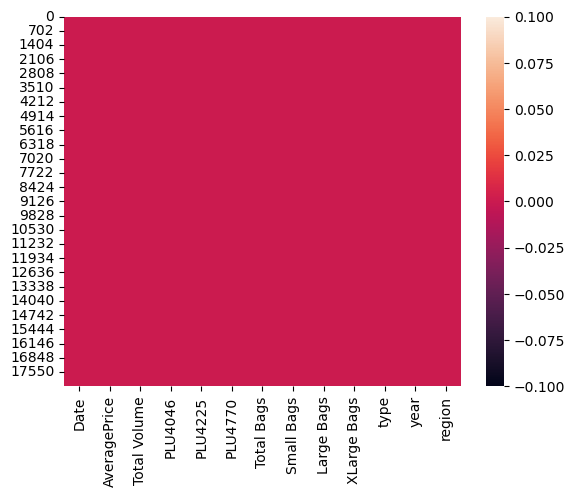

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU4046       18249 non-null  float64
 4   PLU4225       18249 non-null  float64
 5   PLU4770       18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


As we observe Date variable dtype is mentioned as object need to converting date string into datetime format

There is no null value in the dataset as we checked and confirm. Date,type and region column is given in object and all other independent variable are numerical dtypes summary is dtypes: float64(9), int64(1), object(3)
memory usage is 1.8+MB


In [14]:
df["Date"] = pd.to_datetime(df["Date"],format ="%Y-%m-%d")
df["Month"] = df["Date"].dt.month

In [15]:
#Droping date column 
df.drop(["Date"],axis=1,inplace=True)

Observation: Month can have impact on AveragePrice hence extracted month from the date column and year is already exist in dataset so ideal to drop date column

In [16]:
df.shape

(18249, 13)

In [17]:
df.sample(8)

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
14707,1.76,15357.93,3349.00,3122.34,17.00,8869.59,4720.00,4149.59,0.00,organic,2016,WestTexNewMexico,8
6931,1.67,464210.89,273177.19,78151.22,228.88,112653.60,56960.63,55692.97,0.00,conventional,2017,MiamiFtLauderdale,3
5366,1.36,55053.59,1344.18,31561.93,21.67,22125.81,22125.81,0.00,0.00,conventional,2016,Syracuse,10
17848,1.62,2838.38,57.22,465.58,0.00,2315.58,2008.90,306.68,0.00,organic,2018,Jacksonville,2
15549,1.72,180253.26,3467.06,52244.98,0.00,124087.10,109113.00,14974.10,0.00,organic,2017,GreatLakes,10
8480,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany,3
3665,1.23,287688.42,41551.50,129783.55,762.14,115591.23,103961.69,867.73,10761.81,conventional,2016,HarrisburgScranton,7
13162,1.47,1825.53,1.25,1161.26,0.00,663.02,115.48,547.54,0.00,organic,2016,Louisville,5


In [18]:
df.columns.tolist()

['AveragePrice',
 'Total Volume',
 'PLU4046',
 'PLU4225',
 'PLU4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Month']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   PLU4046       18249 non-null  float64
 3   PLU4225       18249 non-null  float64
 4   PLU4770       18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 1.8+ MB


Now 2 object dtypes columns remain in the table and other summary is 9 columns for float64, 2 var for int64, 

# Checking duplicate values

In [20]:
df.duplicated().sum()

0

# Separating Categorical and Numerical Variables

In [21]:
cat_col=[]

for i in df.dtypes.index:
    if df.dtypes[i] =="object":
        cat_col.append(i)
print("Categorical columns",cat_col)
print("\n")

Categorical columns ['type', 'region']




In [22]:
num_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical columns",num_col)
print("\n")

Numerical columns ['AveragePrice', 'Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month']




# # Statistical summary  of dataset

In [23]:
# # Statistical summary of numerical columns of  Avacado Dataset
df.describe()

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


Observation:
Count for all variables is the same hence no null values present.
Mean>Median in TotalVolume, PLU4770, LargeBags Xlargebags indicating Right Skewed data
Median>Mean in PLU4046,TotalBags,SmallBags indicating Left Skewed data
Difference between 75% and max is high indicating presence of outliers

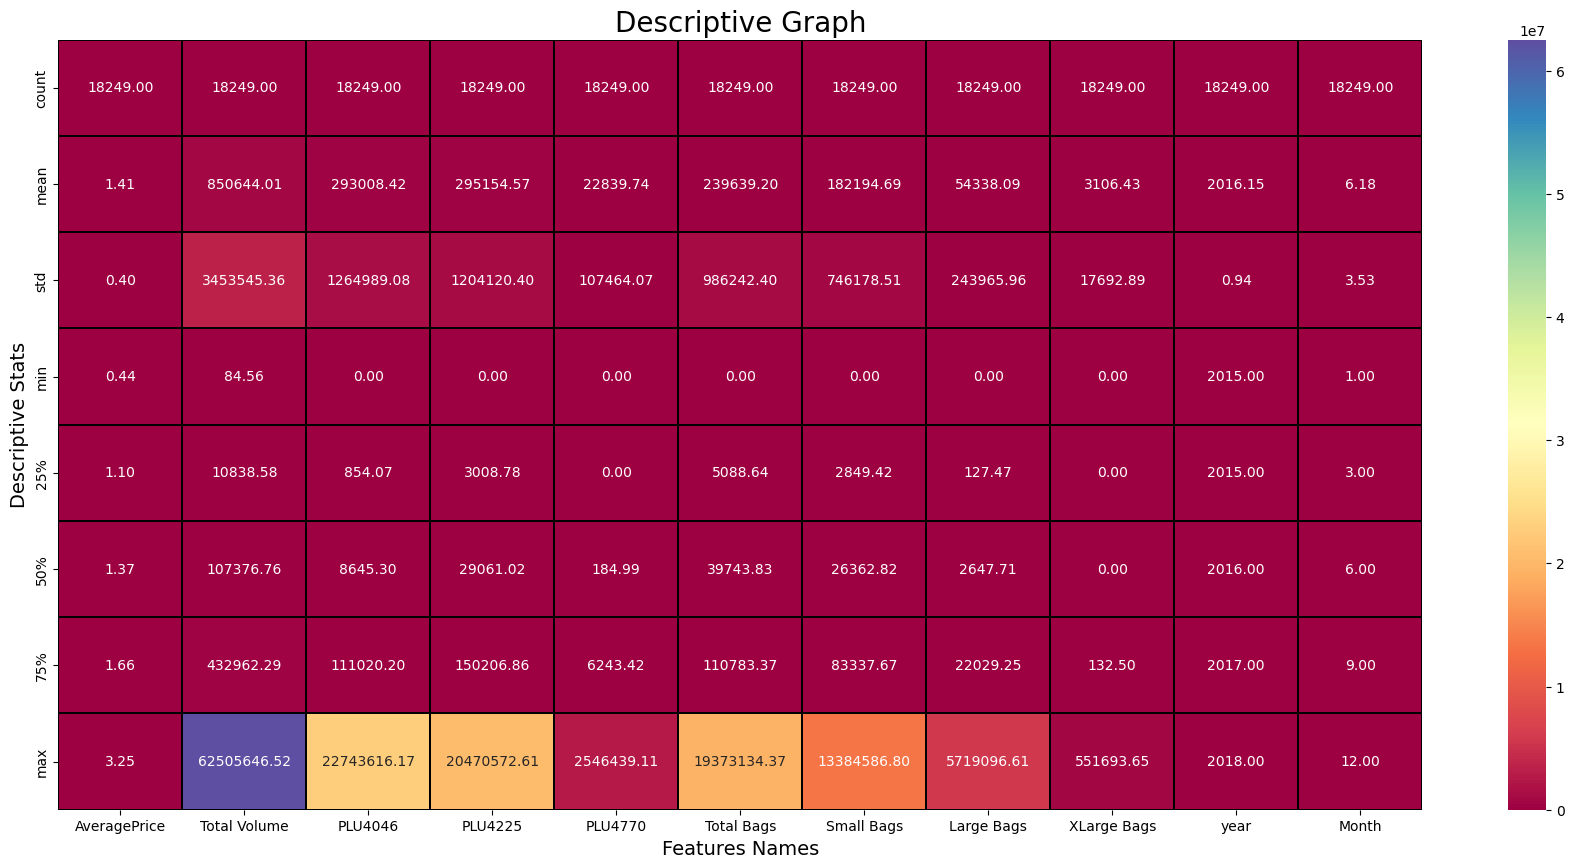

In [24]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Features Names",fontsize=14)
plt.ylabel("Descriptive Stats",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [25]:
#checking the  unique value count for each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: PLU4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: PLU4225, Length: 18103, dtype: int64


0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       

In [26]:
#checking number of unique values in avacado dataset
df.nunique().to_frame("No.of unique value")

,No.of unique value
AveragePrice,259
Total Volume,18237
PLU4046,17702
PLU4225,18103
PLU4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588
type,2


# Data Visualization

# Univariate Analysis

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


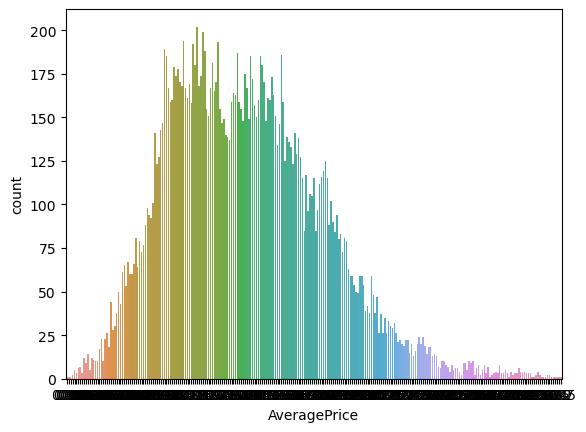

In [27]:
#Visualize the number of label target as 

sns.countplot(x="AveragePrice",data=df)
print(df["AveragePrice"].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

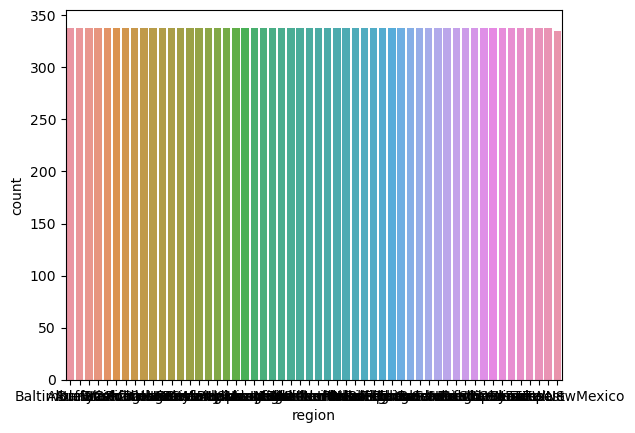

In [28]:
sns.countplot(x="region",data=df)
print(df["region"].value_counts())

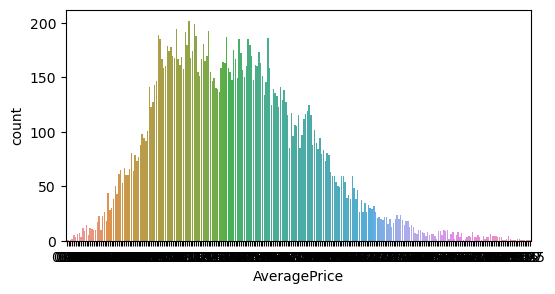

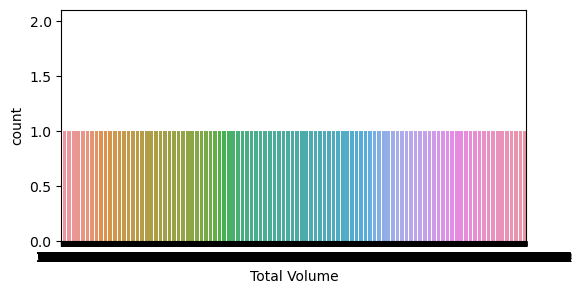

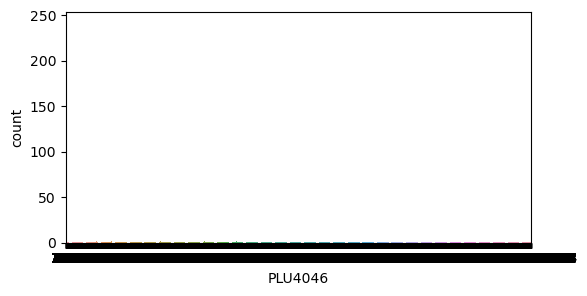

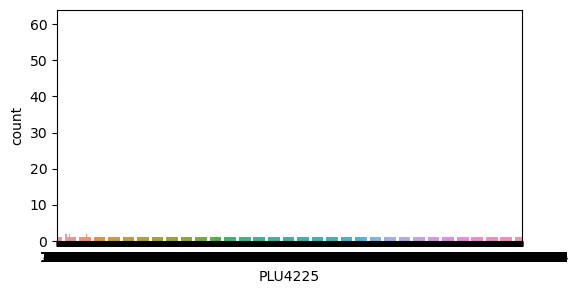

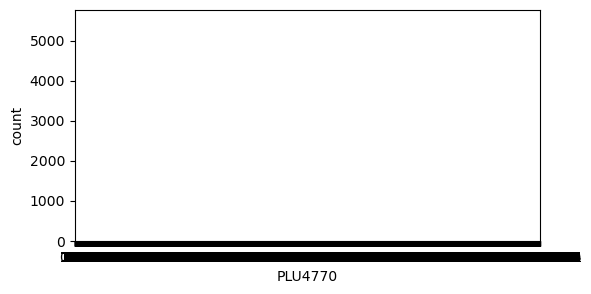

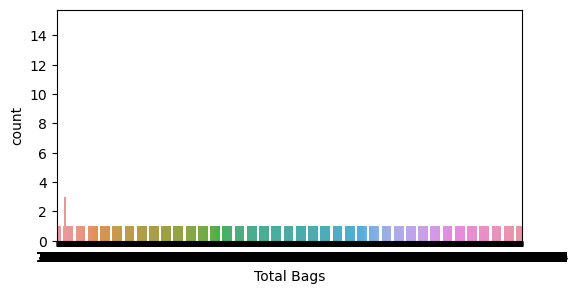

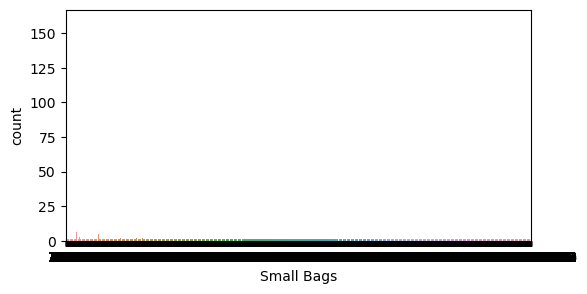

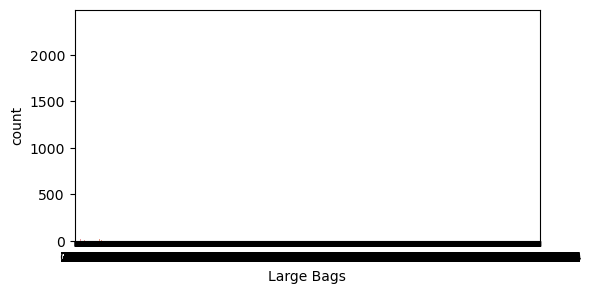

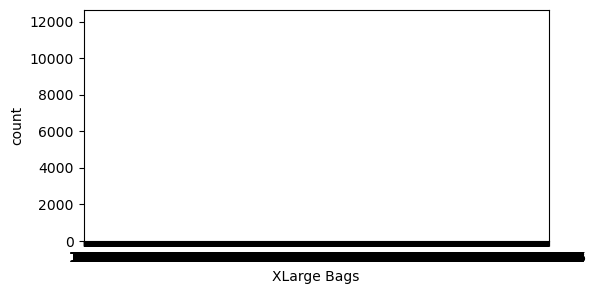

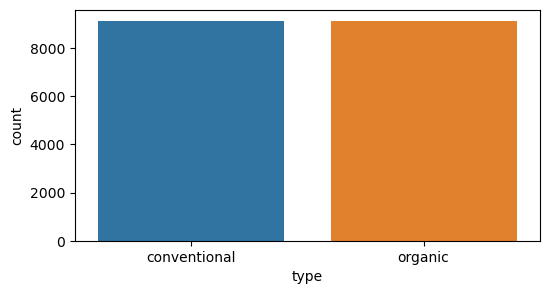

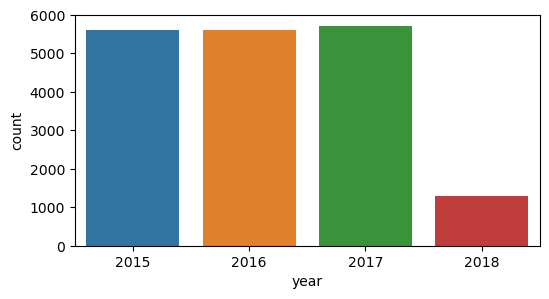

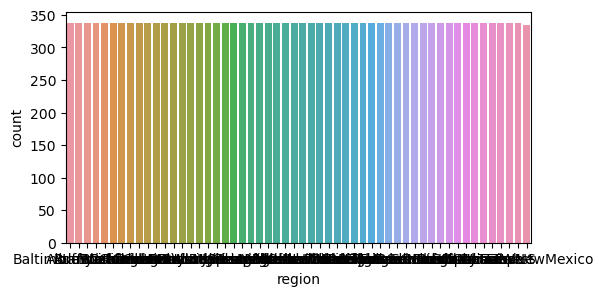

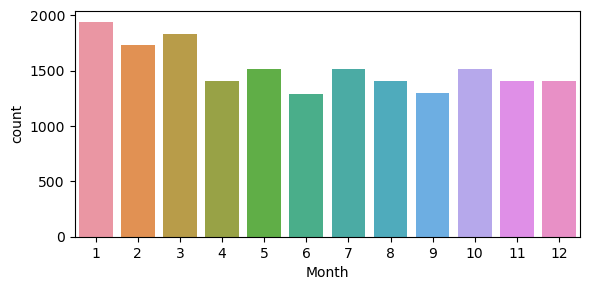

In [32]:
# Checking the count of each feature and target variable

for i in df:
    plt.figure(figsize=(6,3),facecolor="white")
    sns.countplot(x=i,data=df)
plt.tight_layout()
plt.show()

# Checking the distribution of the data by using distplot

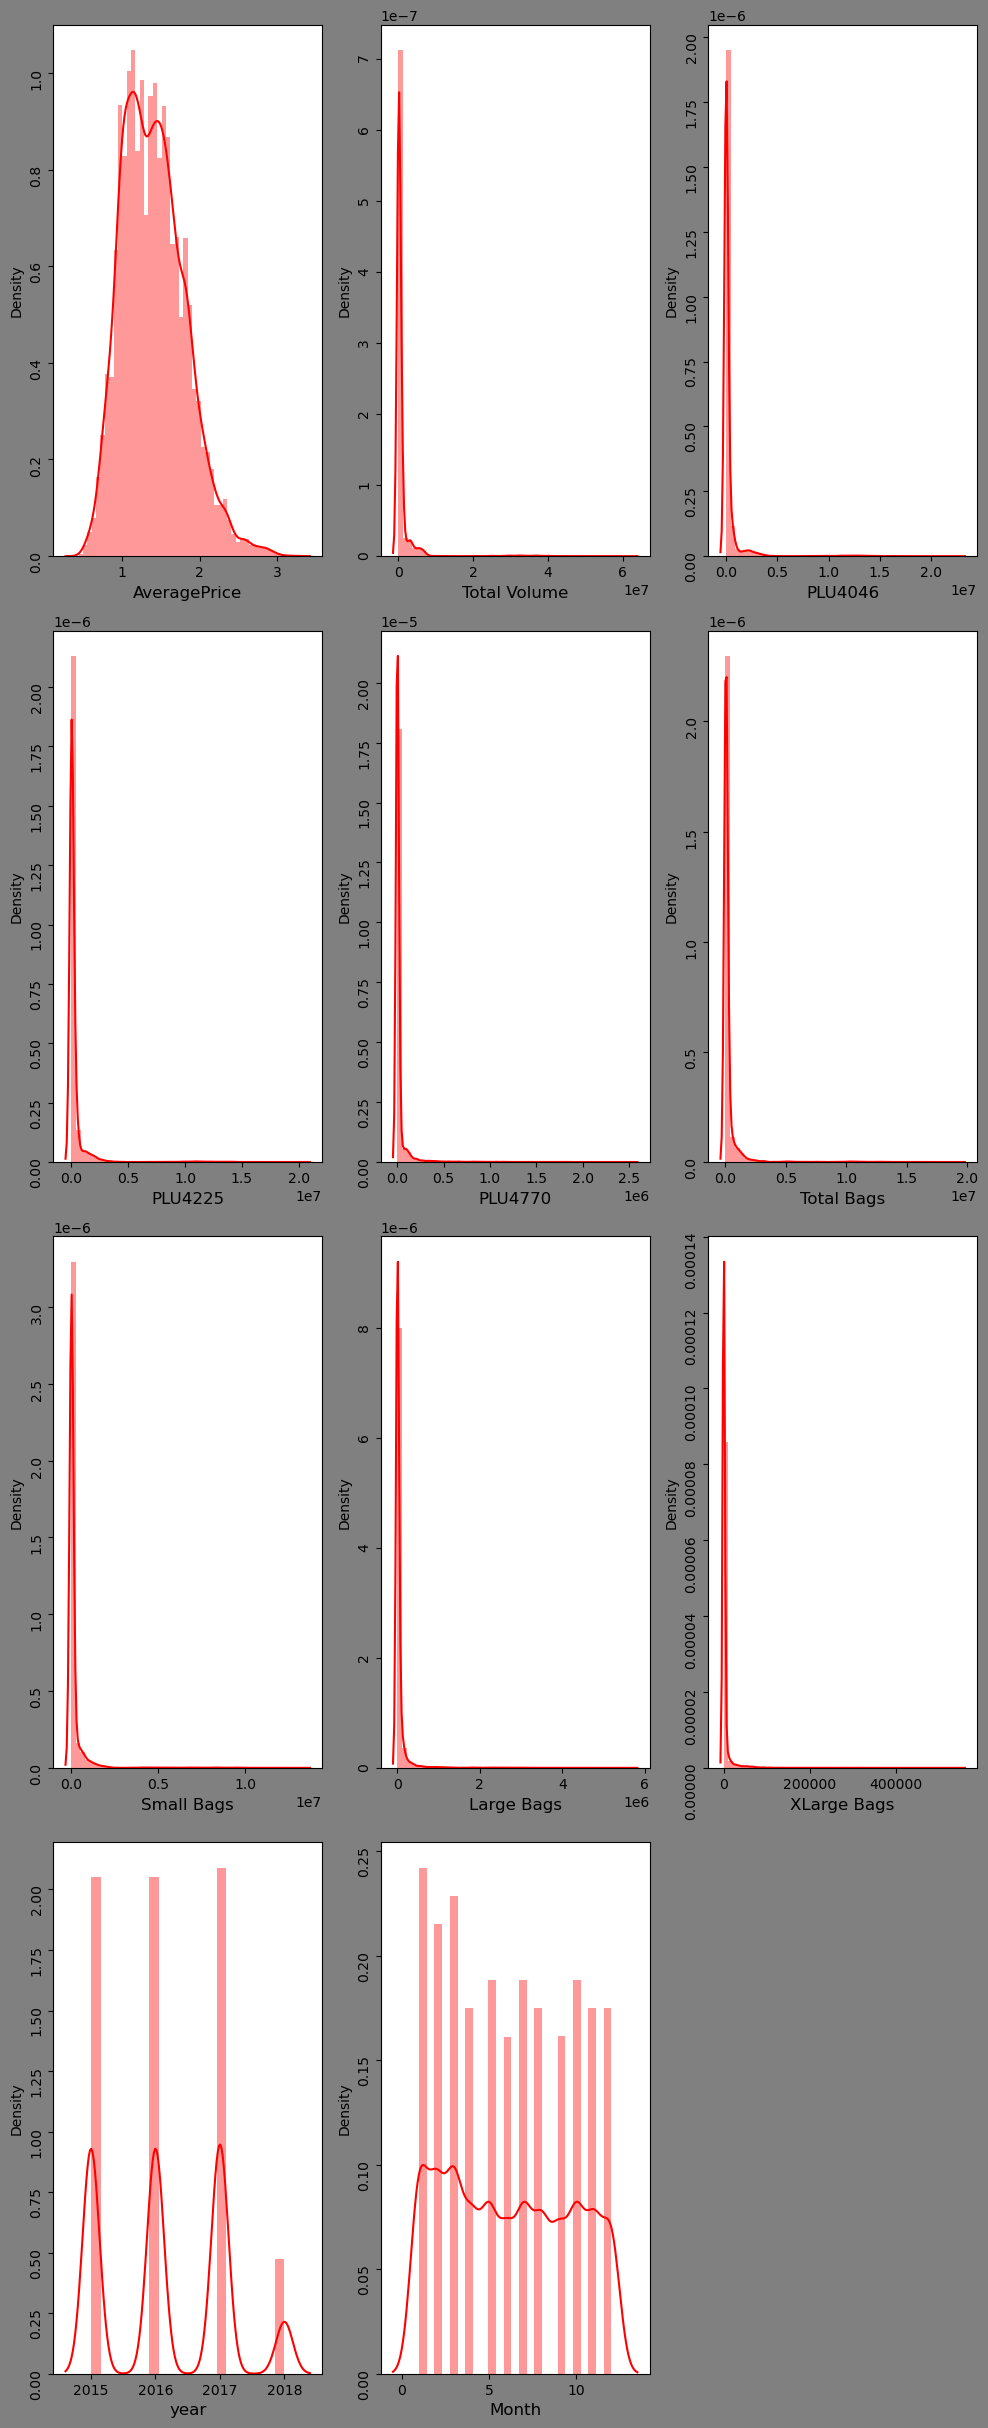

In [34]:
# Lets check how the data has been distributed in numerical column

plt.figure(figsize=(10,30),facecolor="grey")
pltno=1
for col in num_col:
    if pltno<=11:
        ax=plt.subplot(5,3,pltno)
        sns.distplot(df[col],color="r")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 90, fontsize = 10)
    pltno+=1
plt.tight_layout()

# Bivariate Analysis

<Figure size 400x200 with 0 Axes>

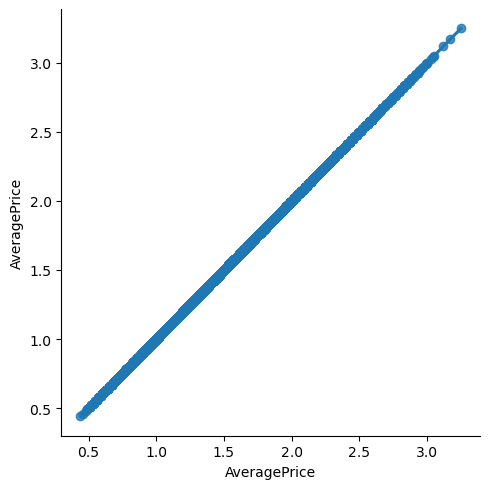

<Figure size 400x200 with 0 Axes>

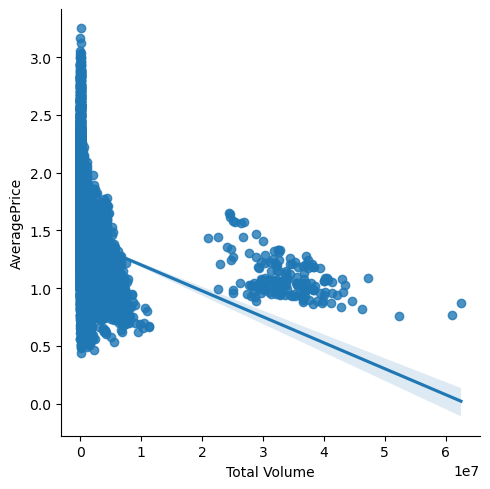

<Figure size 400x200 with 0 Axes>

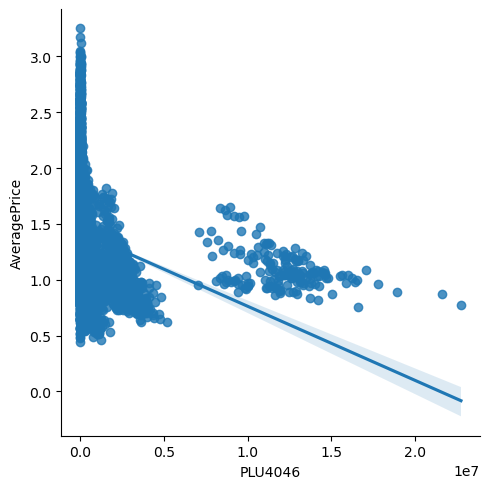

<Figure size 400x200 with 0 Axes>

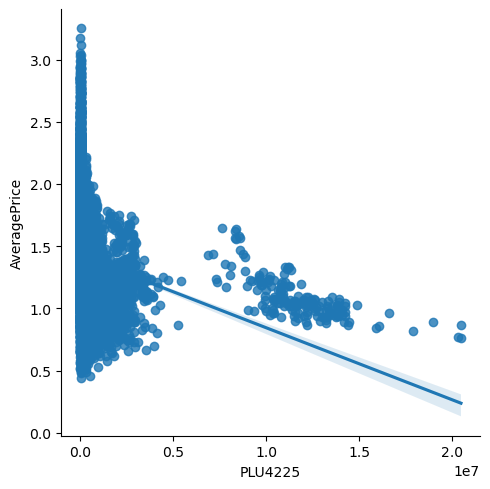

<Figure size 400x200 with 0 Axes>

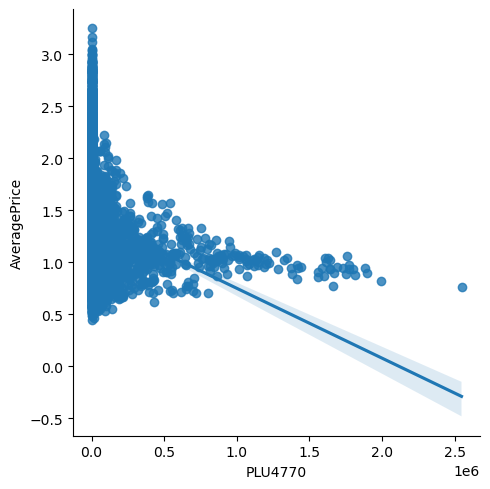

<Figure size 400x200 with 0 Axes>

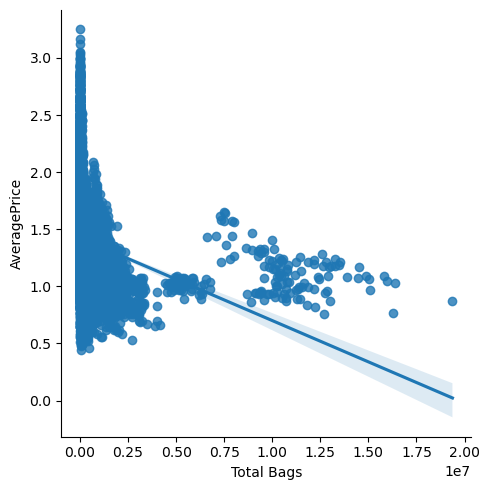

<Figure size 400x200 with 0 Axes>

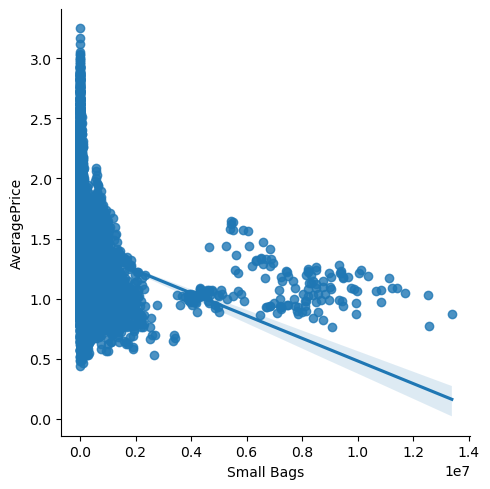

<Figure size 400x200 with 0 Axes>

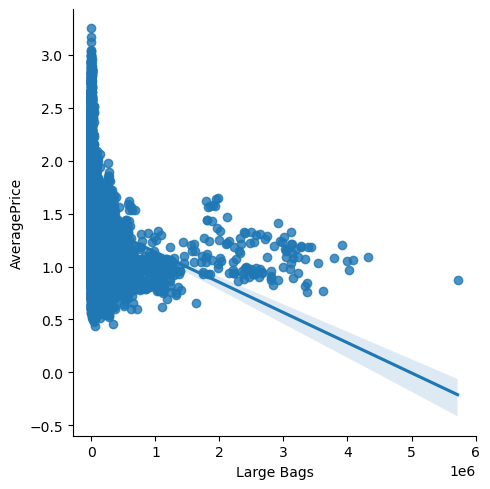

<Figure size 400x200 with 0 Axes>

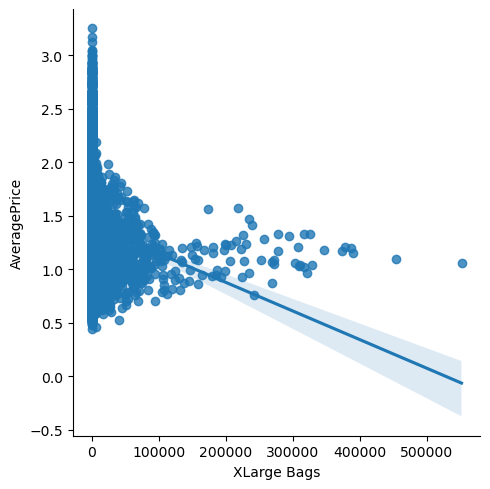

<Figure size 400x200 with 0 Axes>

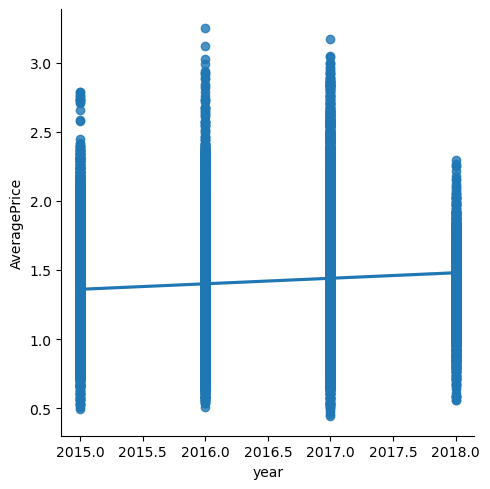

<Figure size 400x200 with 0 Axes>

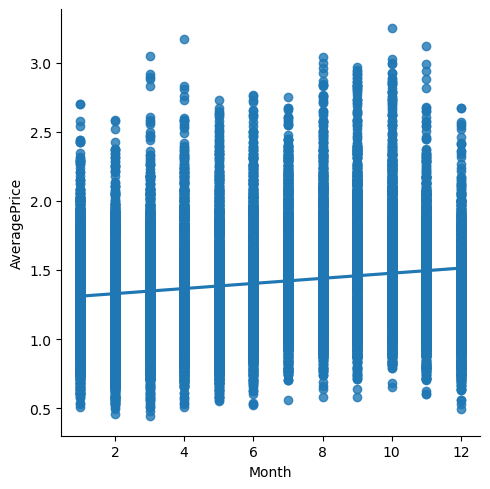

In [17]:
for i in  num_col:
    plt.figure(figsize=(4,2),facecolor="white")
    sns.lmplot(x=i ,y="AveragePrice", data=df, palette="colorblind")
    plt.xlabel(i)
    plt.ylabel("AveragePrice")
plt.show()

Average price generally decrease with increase in Total Volume, PLU4046, PLU4225, PLU4770, Total Bags, Small Bags, Large Bags, XLarge Bags, 

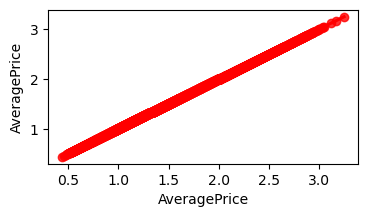

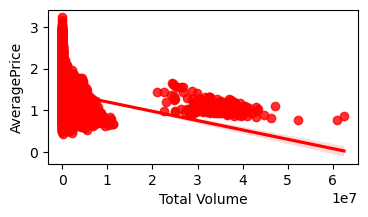

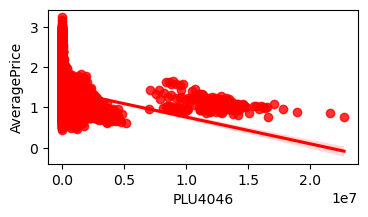

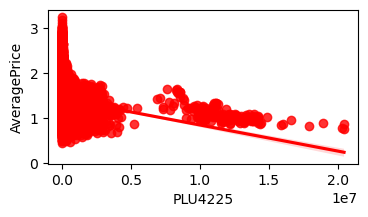

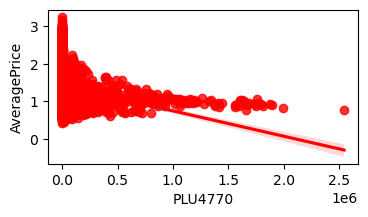

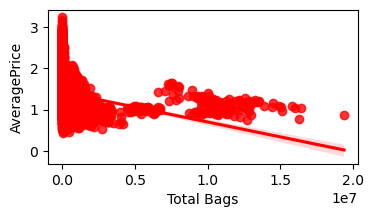

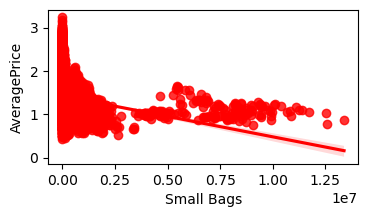

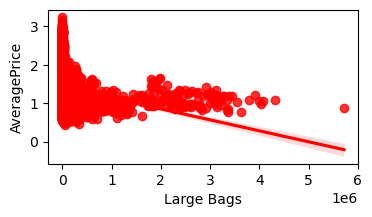

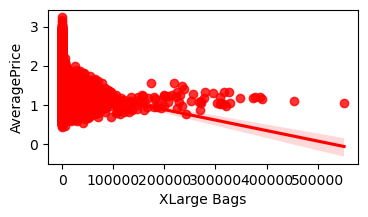

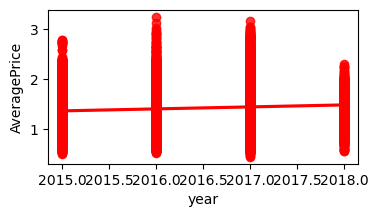

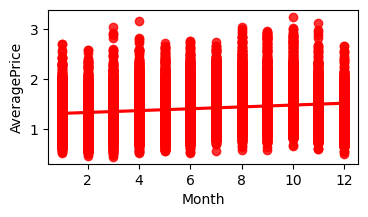

In [44]:
for i in  num_col:
    plt.figure(figsize=(4,2),facecolor="white")
    sns.regplot(x=i ,y="AveragePrice", data=df, color="r")
    plt.xlabel(i)
    plt.ylabel("AveragePrice")
plt.show()

Same plot feature as lmplot with target

<Axes: title={'center': 'Year v/s Region'}, xlabel='year', ylabel='region'>

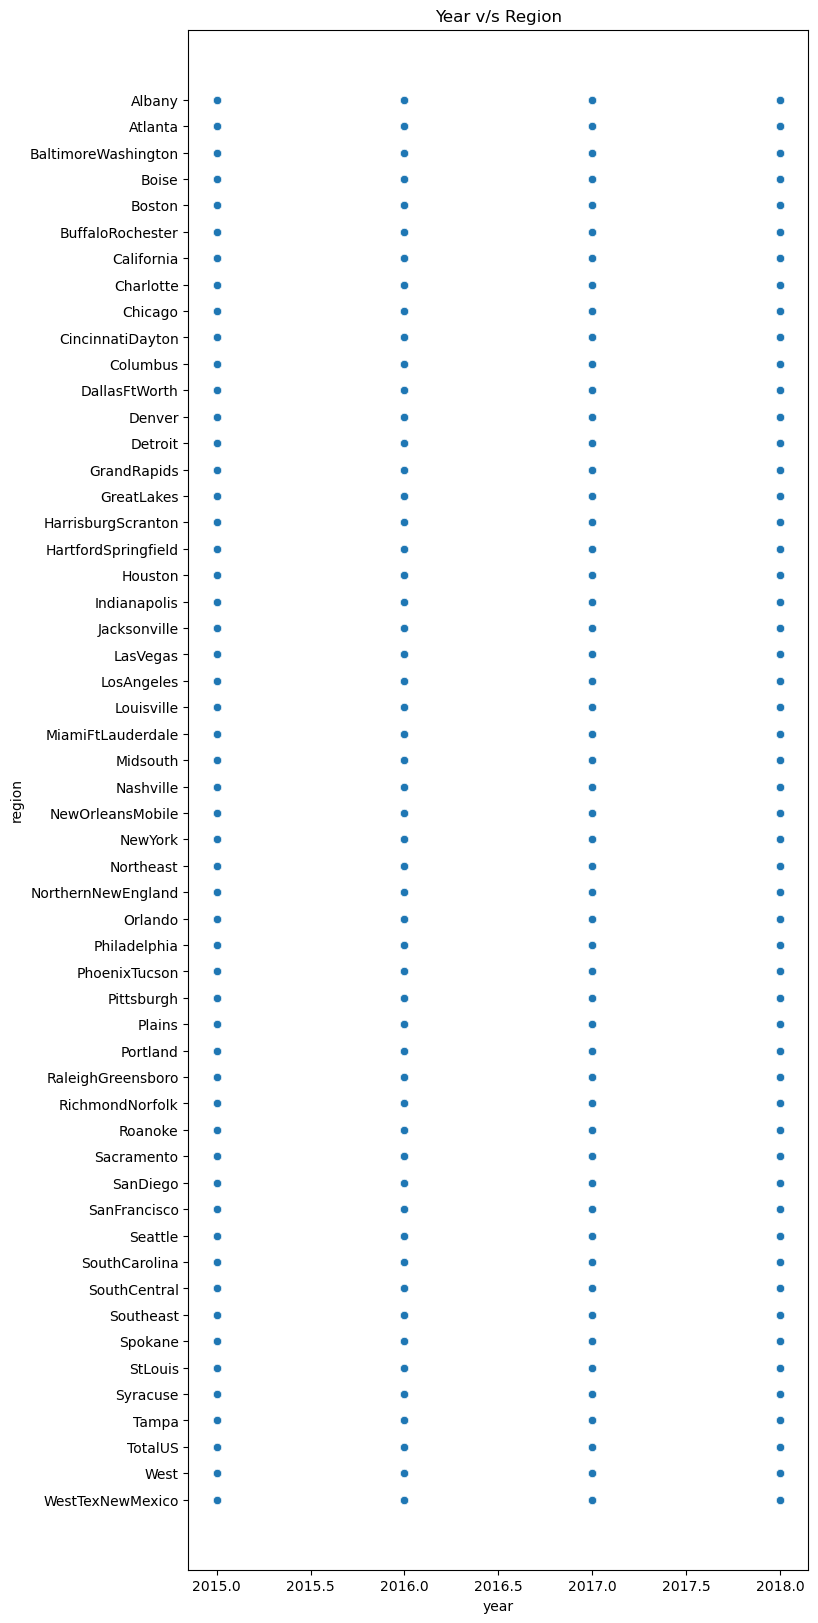

In [29]:
plt.figure(figsize=(8,20))
plt.title('Year v/s Region')
sns.scatterplot(x='year',y='region',data=df)

Observation: No relation between year and region, avacados are from all regions

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'L

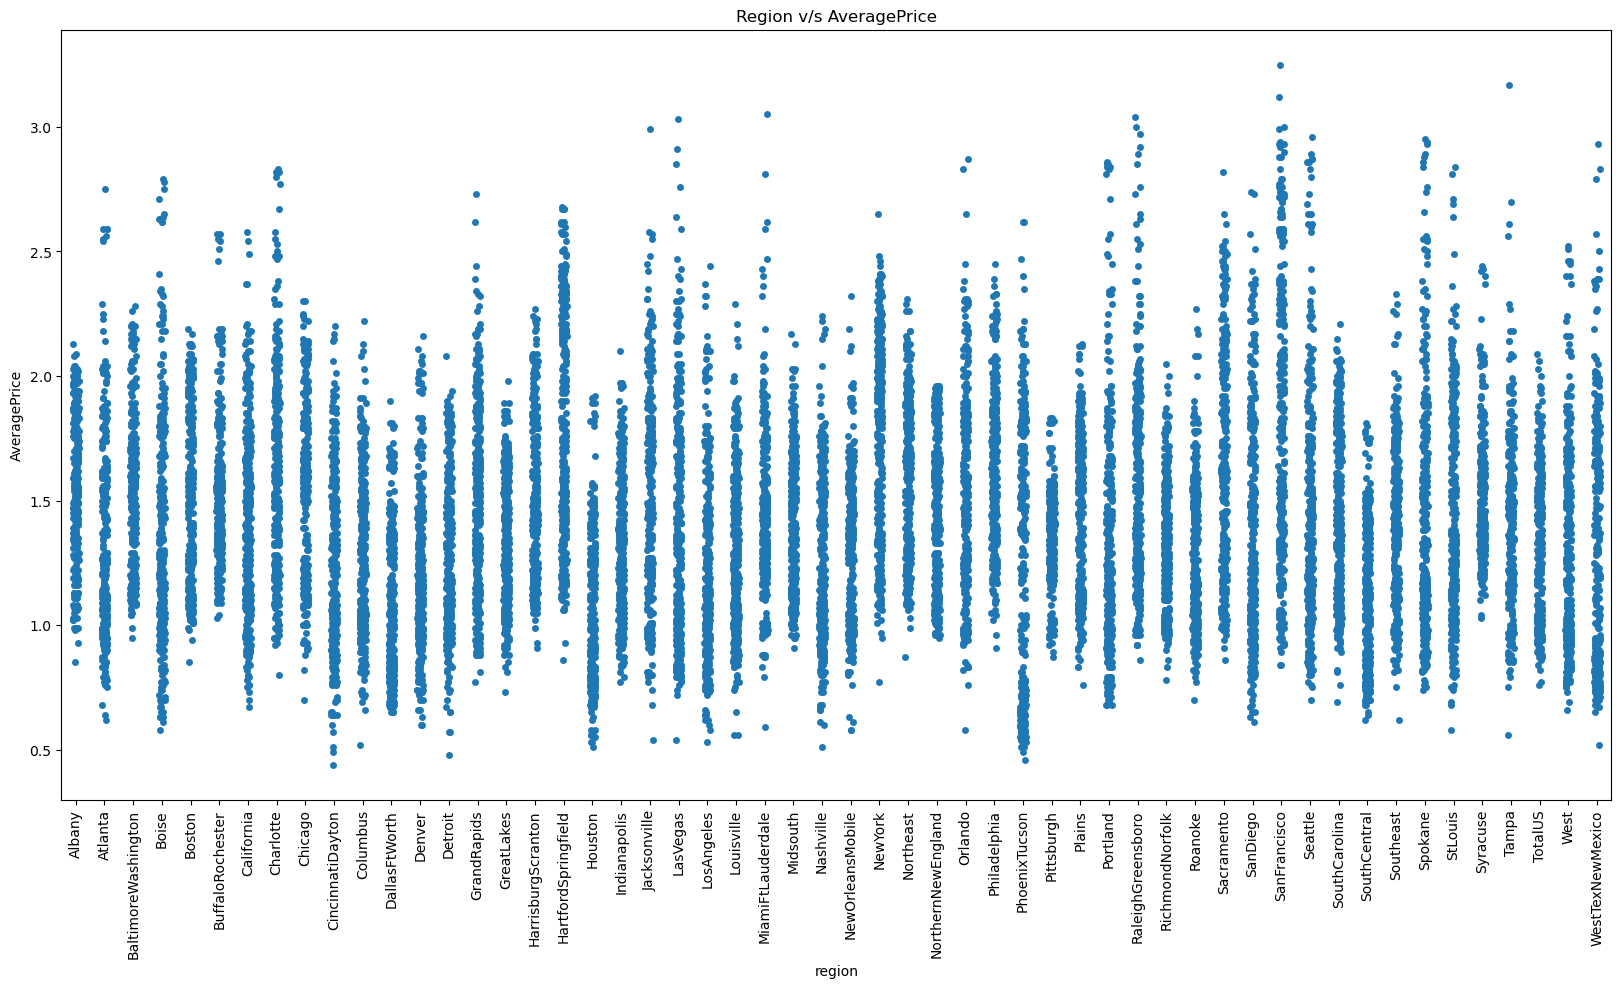

In [30]:
plt.figure(figsize=(20,10))
plt.title("Region v/s AveragePrice")
sns.stripplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

Observation: Average price is highest for Sanfrancisco

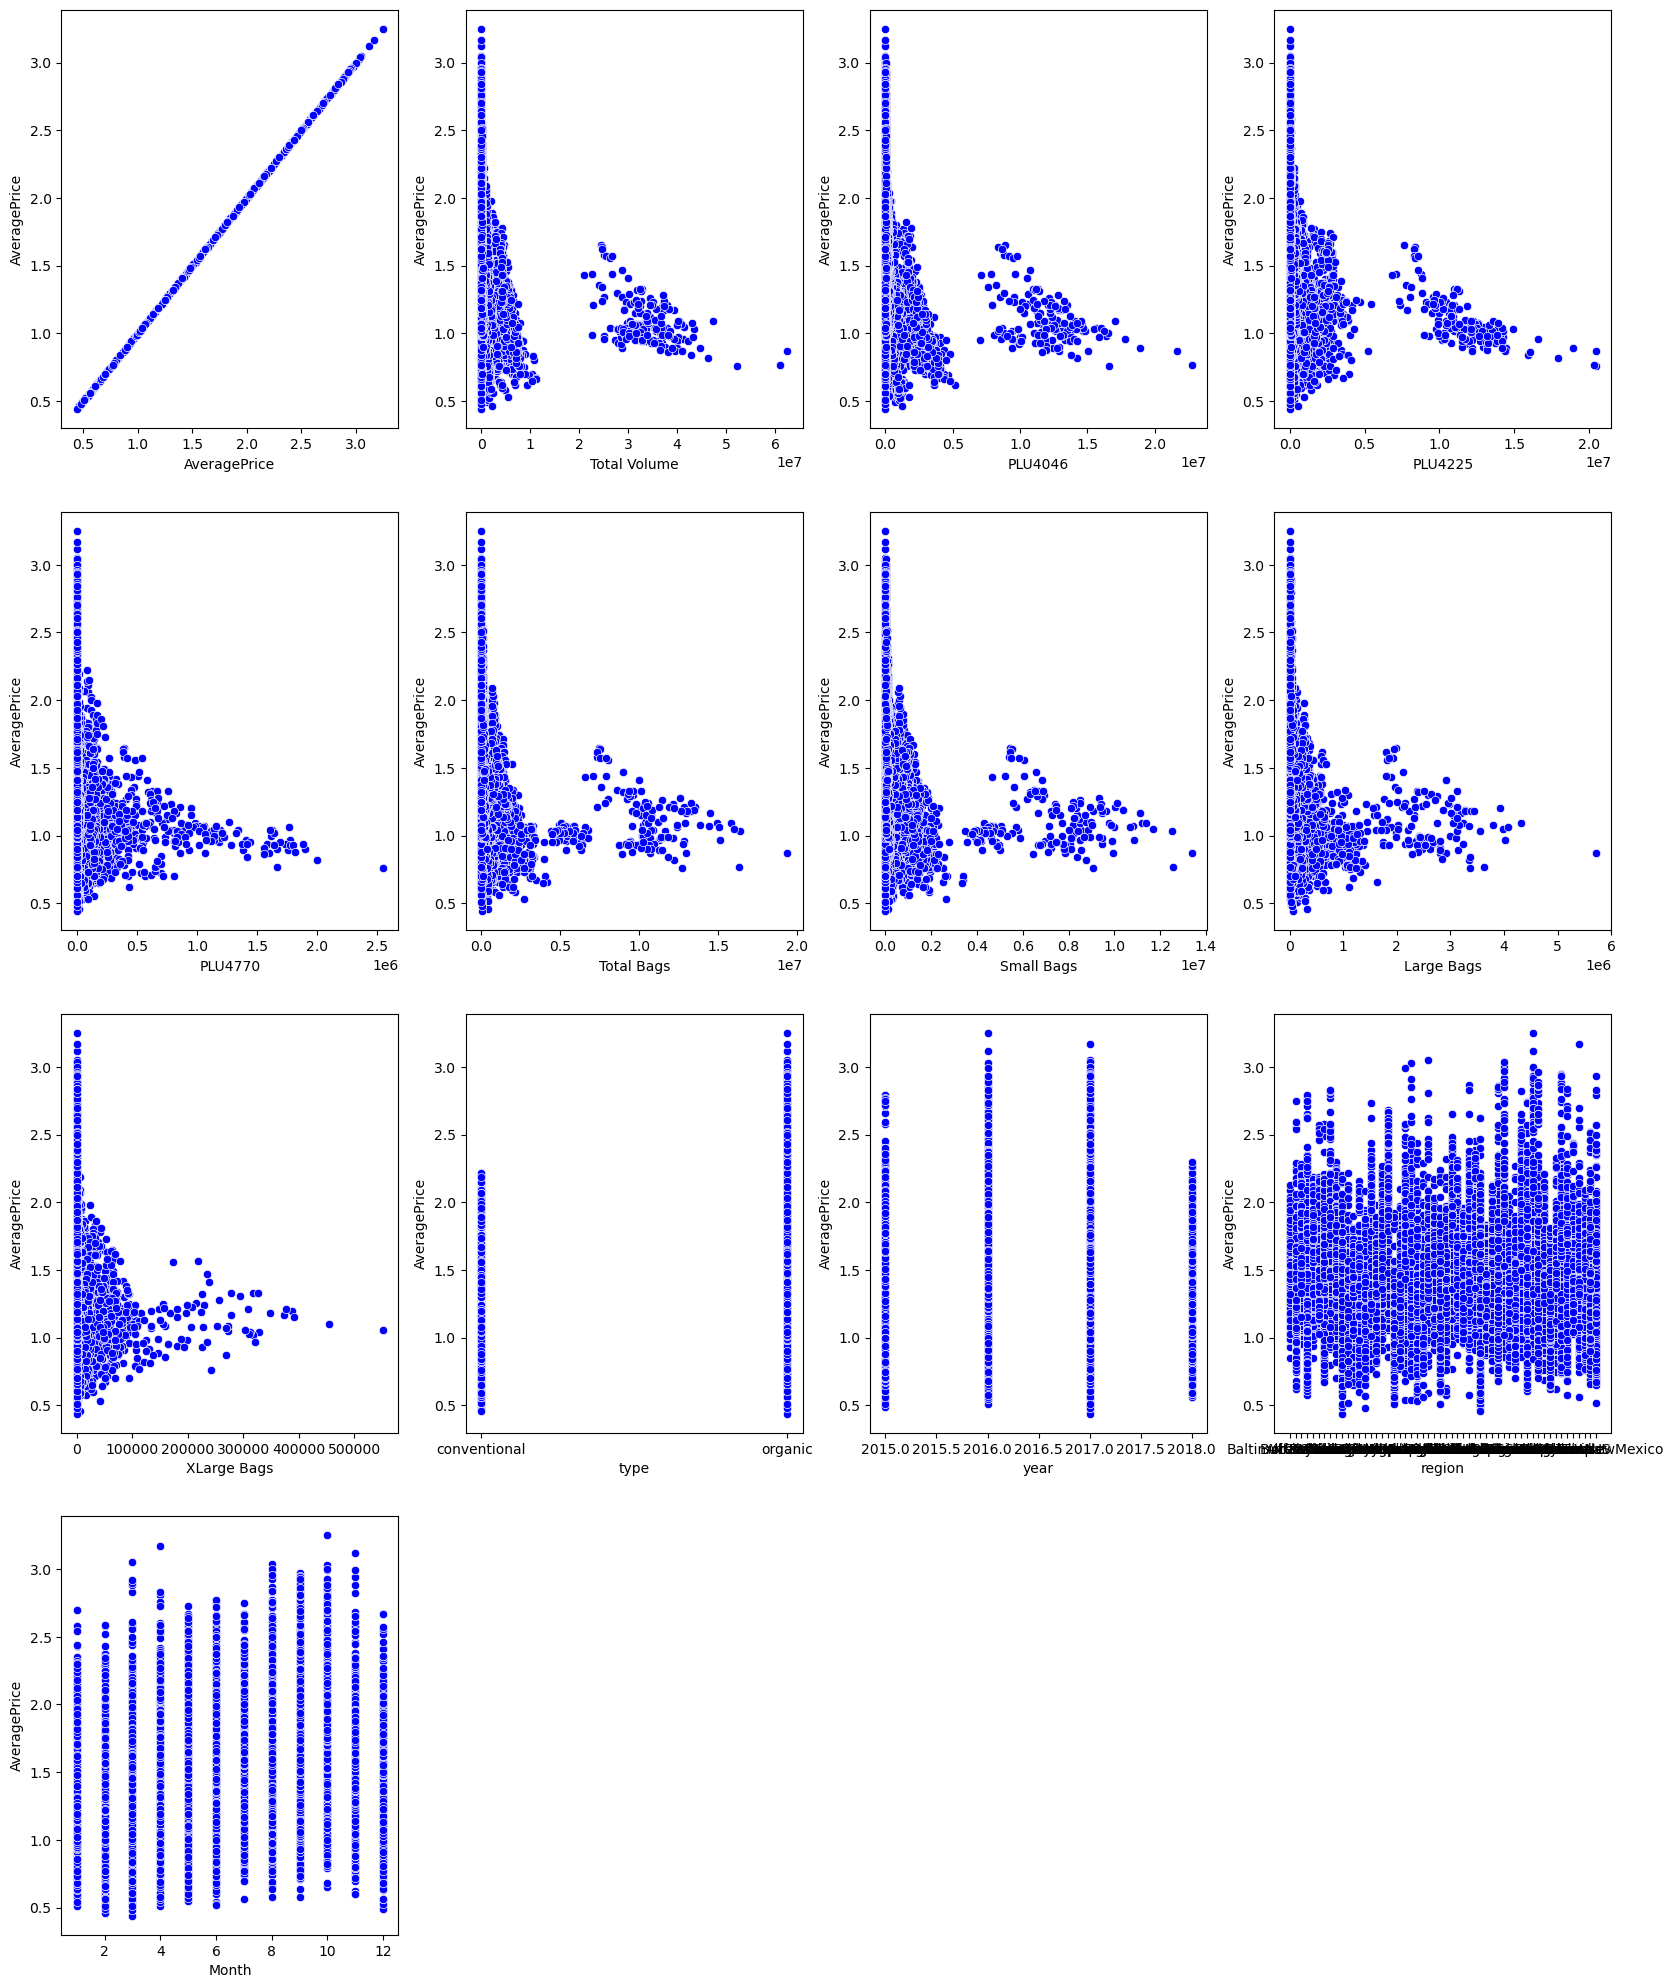

In [48]:
#Comparing AveragePrice  with other columns using scatter plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=14:
        plt.subplot(4,4,p)
        sns.scatterplot(x=i,y="AveragePrice", data =df, color='b')
        plt.xlabel(i)
        plt.ylabel("AveragePrice")
    p+=1
plt.show()

Observation: Month, region has no relation with average price as data is evenly distributed in each month.
year 2016-17 is high and have more density as compare to 2015,2018.
type there is more averageprice and  density in organic in comparison with conventional
all other columns confirm same relation as plot with lmplot and  regressor plot

In [ ]:
#Comparing Region with other columns using scatter plot to find any relationship 
plt.figure(figsize=(45,30))
p=1
for i in df.columns:
    if p<=14:
        plt.subplot(4,4,p)
        sns.scatterplot(x="region",y=i , data =df,color='r')
        plt.xlabel("Region")
        plt.ylabel(i)
    p+=1
plt.tight_layout()    
plt.show()

<Axes: xlabel='region', ylabel='Month'>

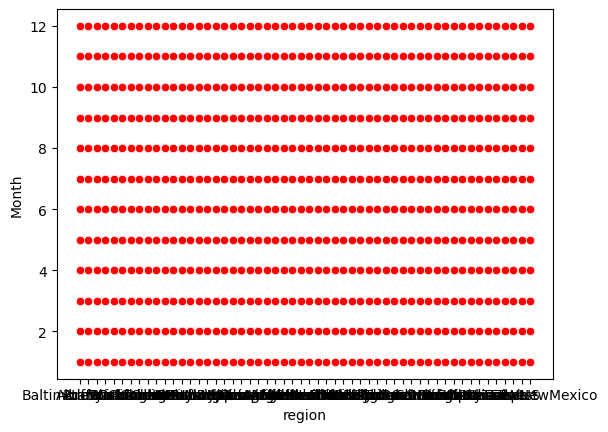

In [31]:
sns.scatterplot(x="region",y="Month" , data =df,color='r')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

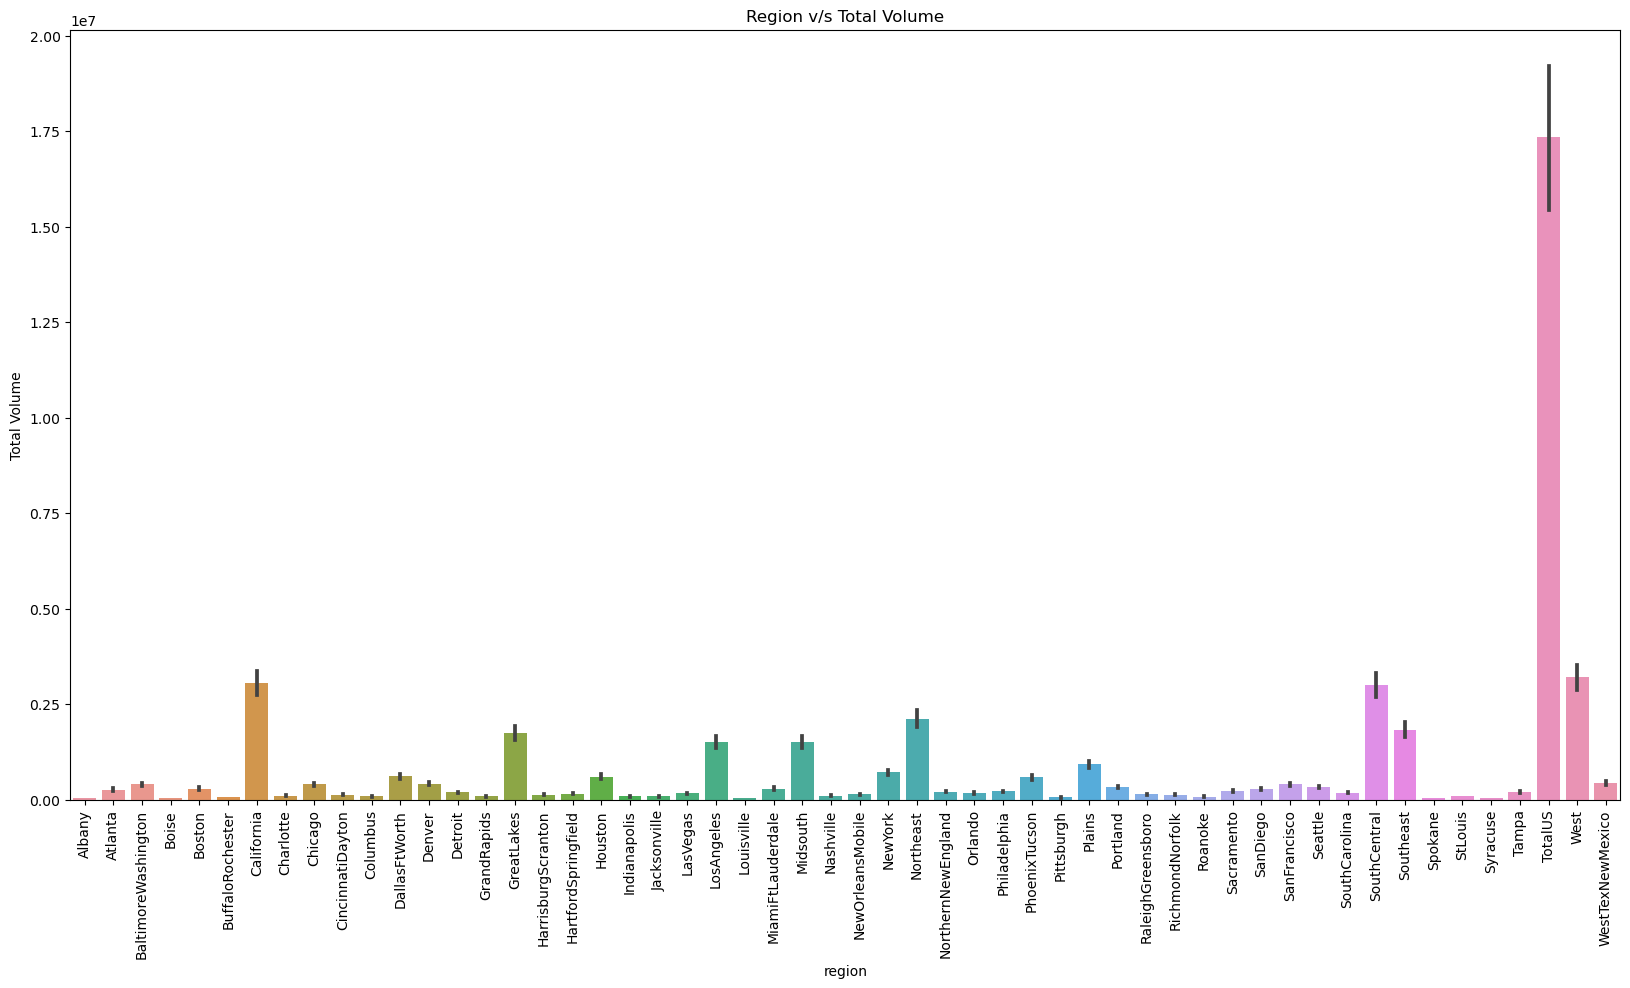

In [32]:
plt.figure(figsize=(20,10))
plt.title('Region v/s Total Volume')
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)

Observation: Volume of avacado is highest is USA and as evident from the chart prior the average value in US is low

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

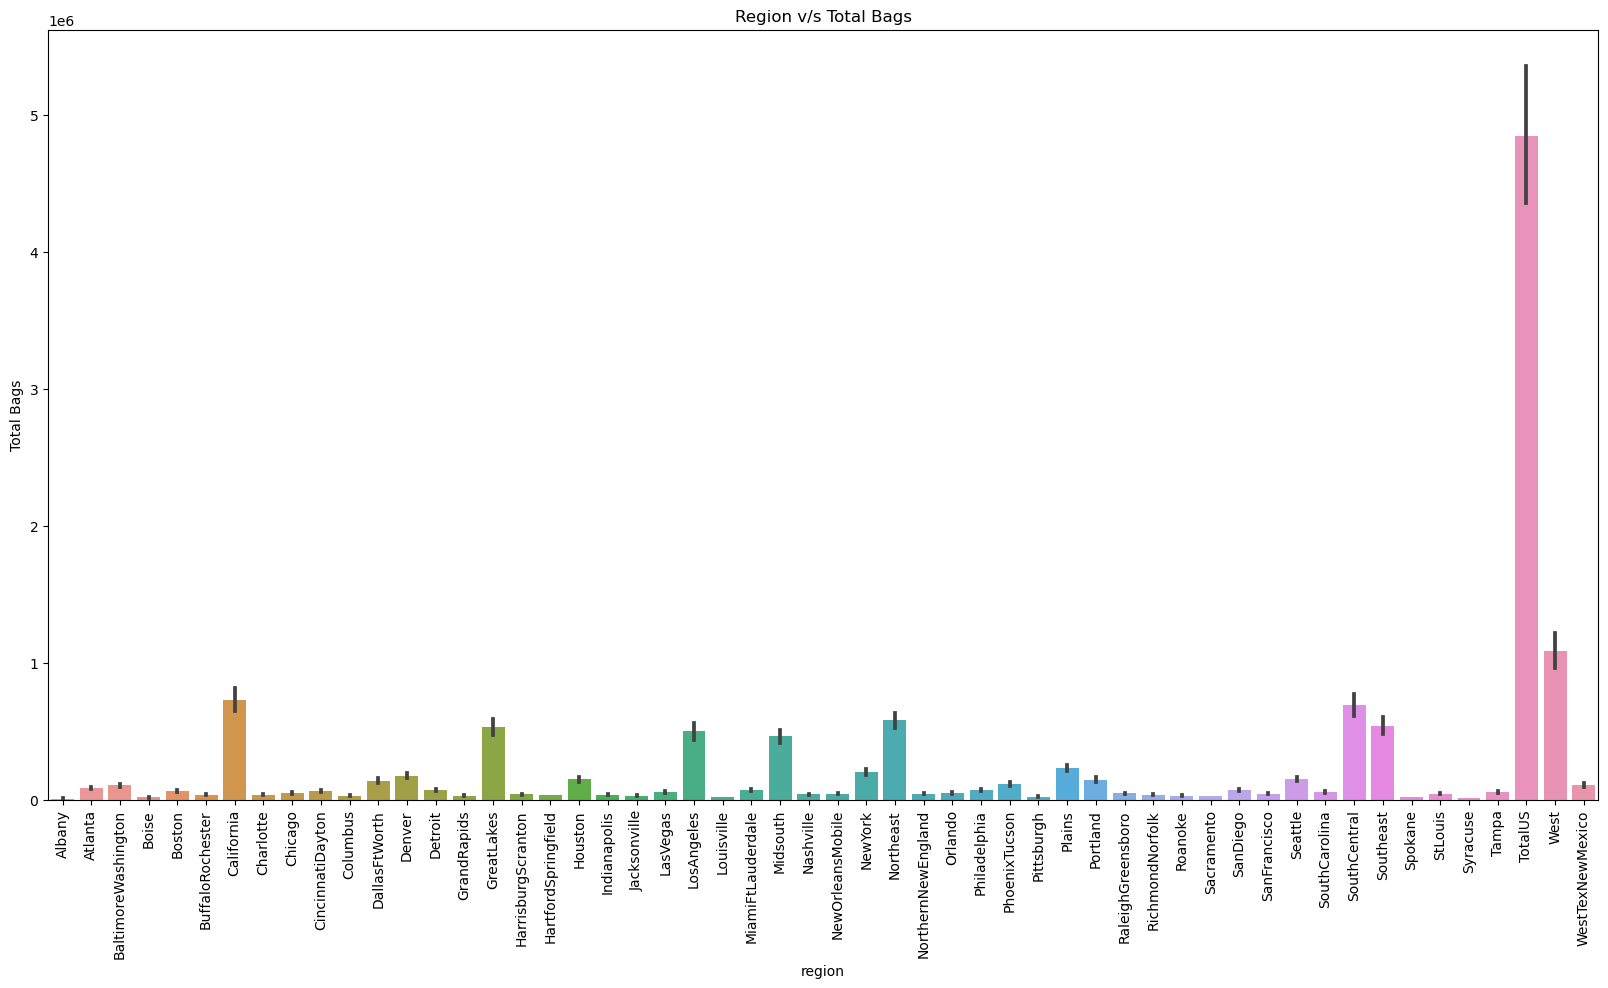

In [33]:
plt.figure(figsize=(20,10))
plt.title('Region v/s Total Bags')
sns.barplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=90)

Obsertvation: As the vol of avacados is high in USA results in high in total bags

<Axes: xlabel='year', ylabel='AveragePrice'>

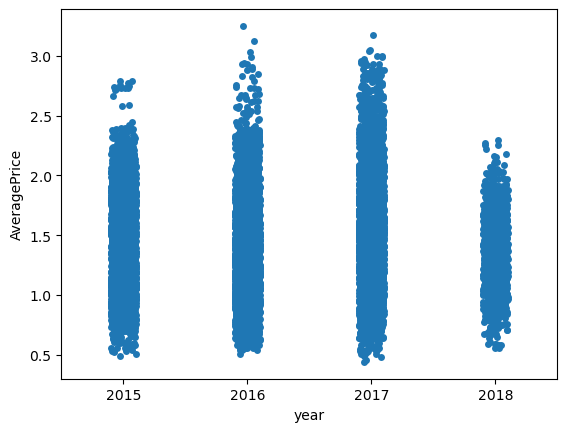

In [34]:
sns.stripplot(x='year',y='AveragePrice',data=df)

<Axes: xlabel='type', ylabel='AveragePrice'>

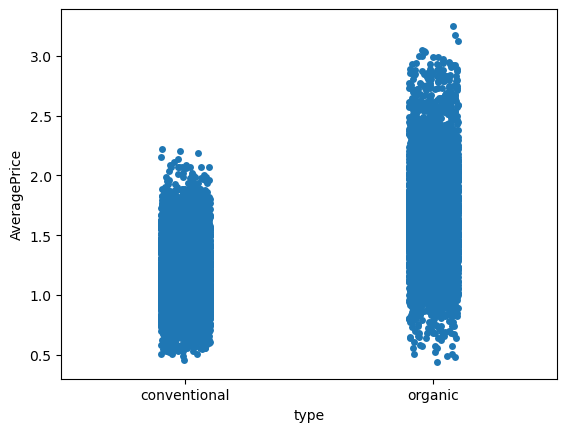

In [35]:
sns.stripplot(x='type',y='AveragePrice',data=df)

<Axes: xlabel='year', ylabel='type'>

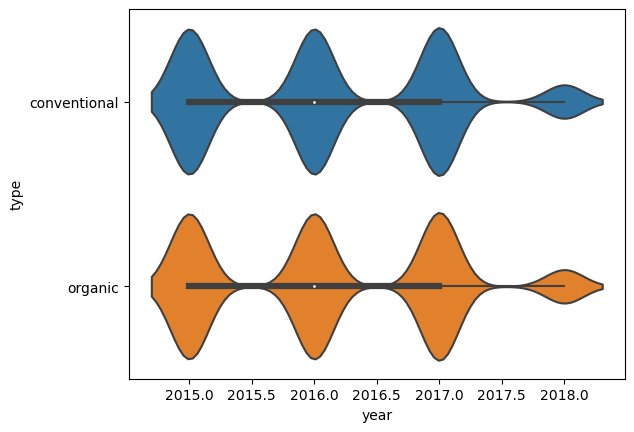

In [28]:
sns.violinplot(x="year",y="type",data=df)

# Multivariate Analysis

In [ ]:
sns.pairplot(data=df)

# Feature Preprocessing

In [1]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()


for i in df:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        

NameError: name 'df' is not defined

In [37]:
df["year"]=OE.fit_transform(df["year"].values.reshape(-1,1))
df["Month"]=OE.fit_transform(df["Month"].values.reshape(-1,1))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   PLU4046       18249 non-null  float64
 3   PLU4225       18249 non-null  float64
 4   PLU4770       18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  float64
 11  region        18249 non-null  float64
 12  Month         18249 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


# Checking for Outliers

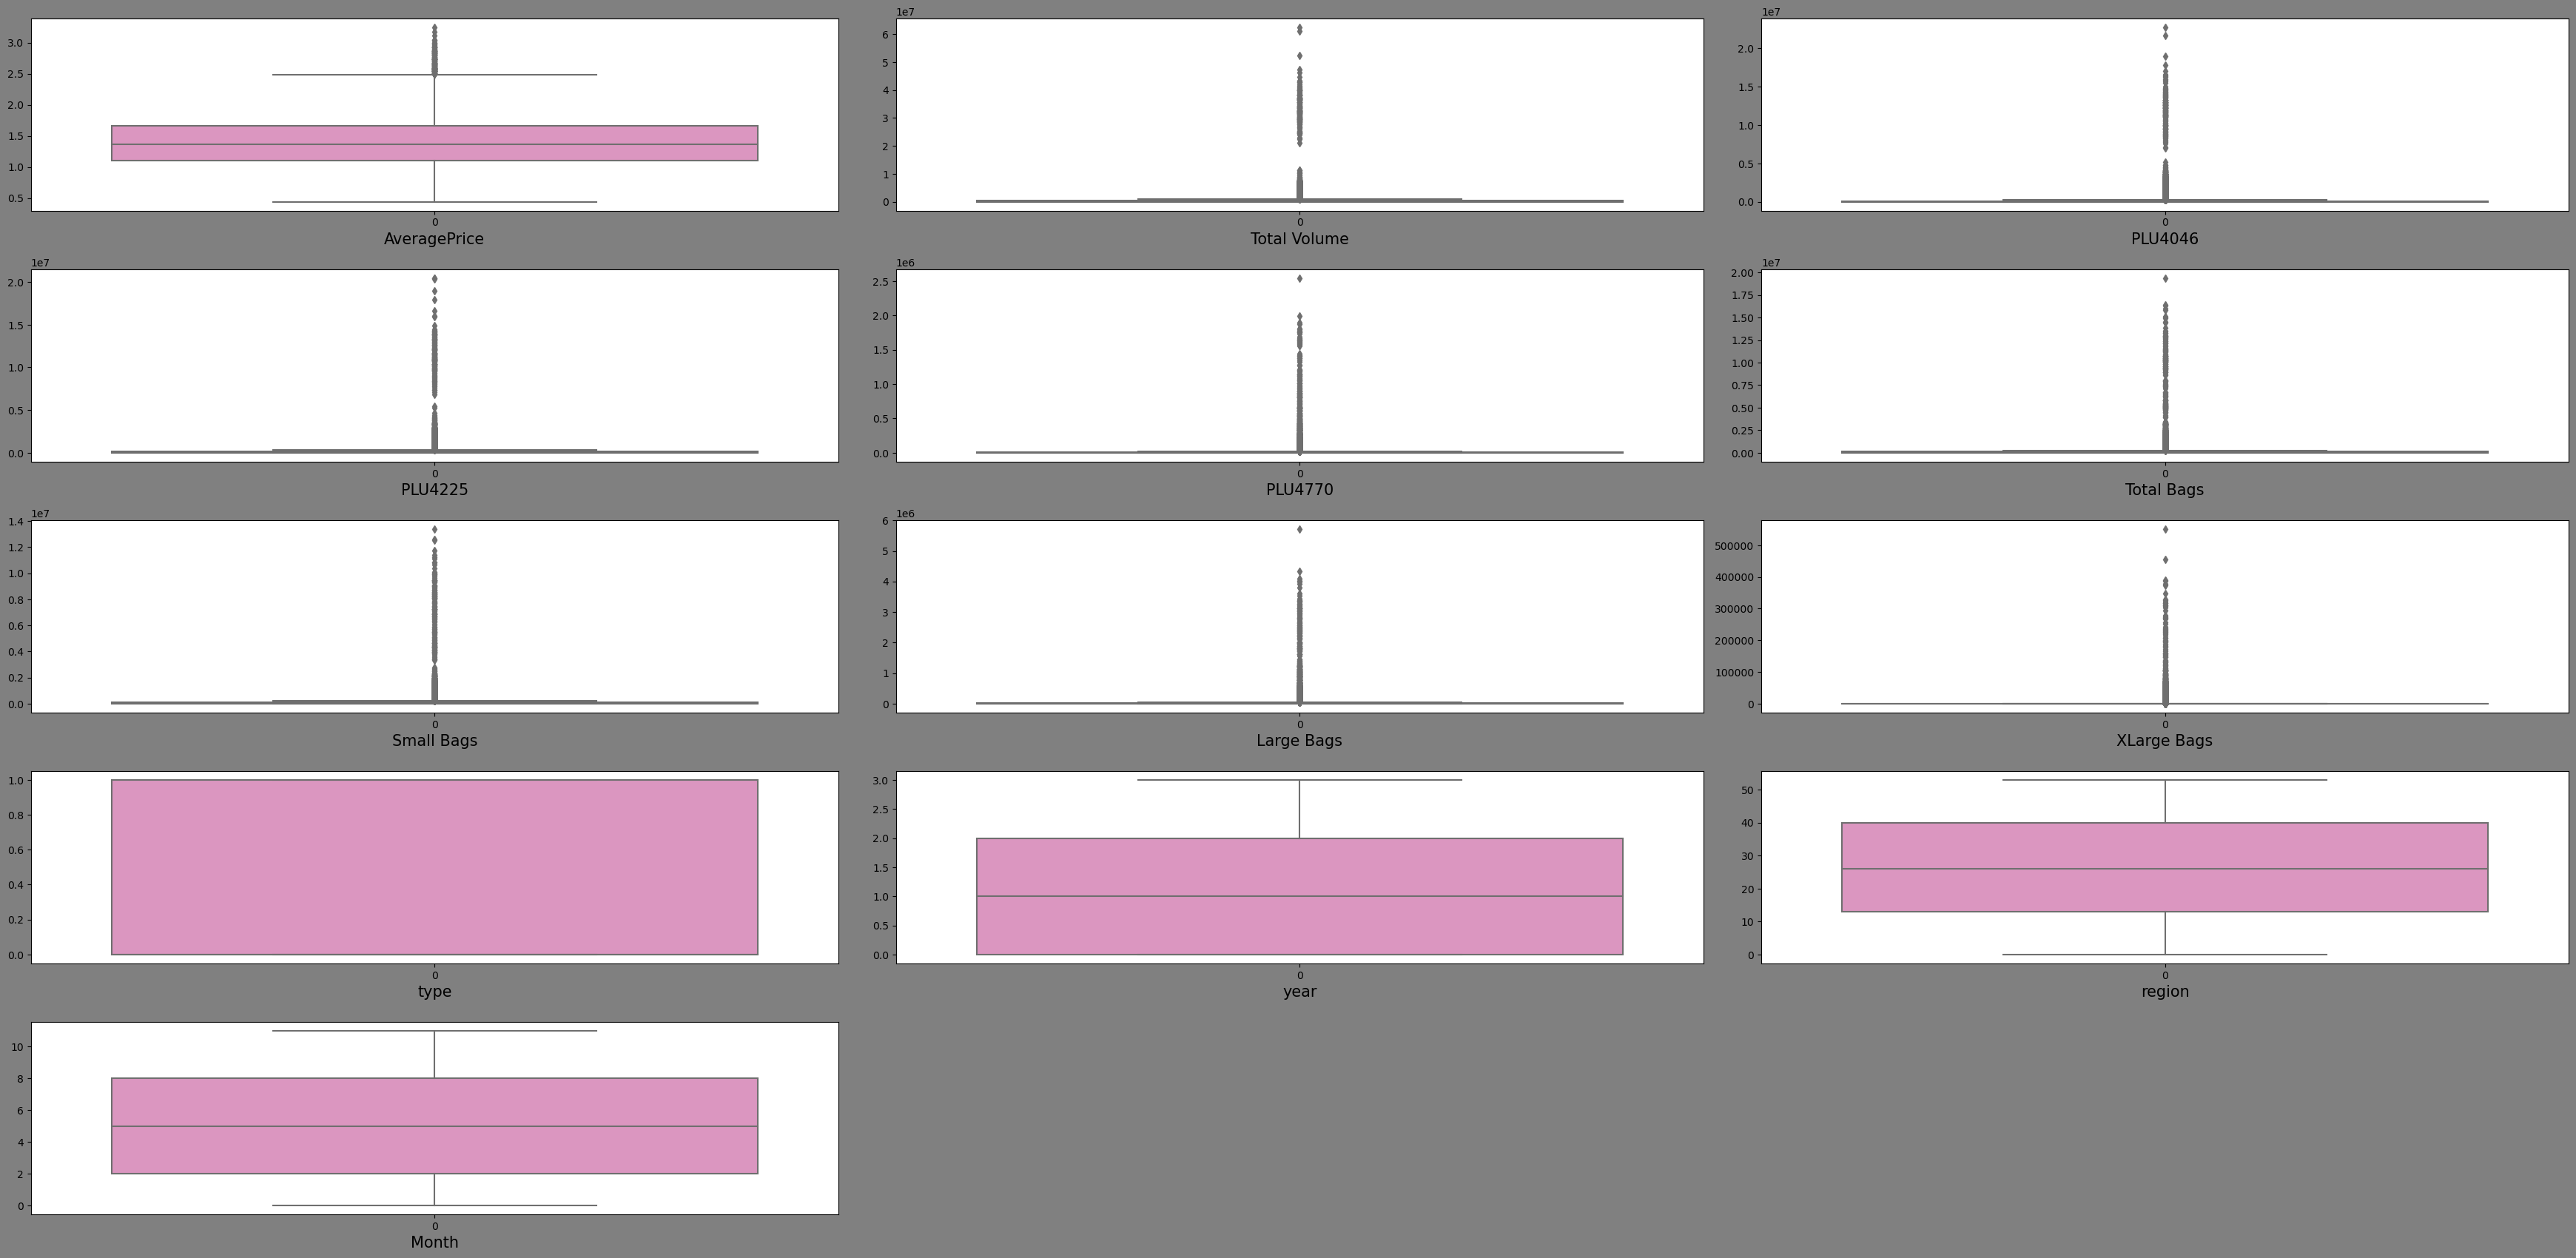

In [39]:
plt.figure(figsize=(35,20),facecolor='grey')
pltno = 1
for i in df:
    if pltno<=13:
        ax=plt.subplot(6,3,pltno)
        sns.boxplot(df[i],palette='Set2_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    pltno+=1
plt.tight_layout()

In [40]:
from scipy.stats import zscore
out_features = df.iloc[:,:]
z = np.abs(zscore(out_features))
z

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252,1.647632
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252,1.647632
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252,1.647632
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252,1.647632
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252,1.364669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811,1.181997
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811,1.464959
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811,1.464959
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811,1.464959


In [41]:
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [42]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(17651, 13)

In [43]:
print("The loss of data in percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

The loss of data in percentage 3.276891884486821


# Checking Skewness

In [44]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
PLU4046         4.909848
PLU4225         4.455745
PLU4770         5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [45]:
df1['Total Volume'] = np.cbrt(df1['Total Volume'])
df1['PLU4046'] = np.cbrt(df1['PLU4046'])
df1['PLU4225'] = np.cbrt(df1['PLU4225'])
df1['PLU4770'] = np.cbrt(df1['PLU4770'])
df1['Small Bags'] = np.cbrt(df1['Small Bags'])
df1['Total Bags'] = np.cbrt(df1['Total Bags'])
df1['Large Bags'] = np.cbrt(df1['Large Bags'])
df1['XLarge Bags'] = np.cbrt(df1['XLarge Bags'])

In [46]:
df1.skew()

AveragePrice    0.377432
Total Volume    1.240435
PLU4046         1.555876
PLU4225         1.277025
PLU4770         1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

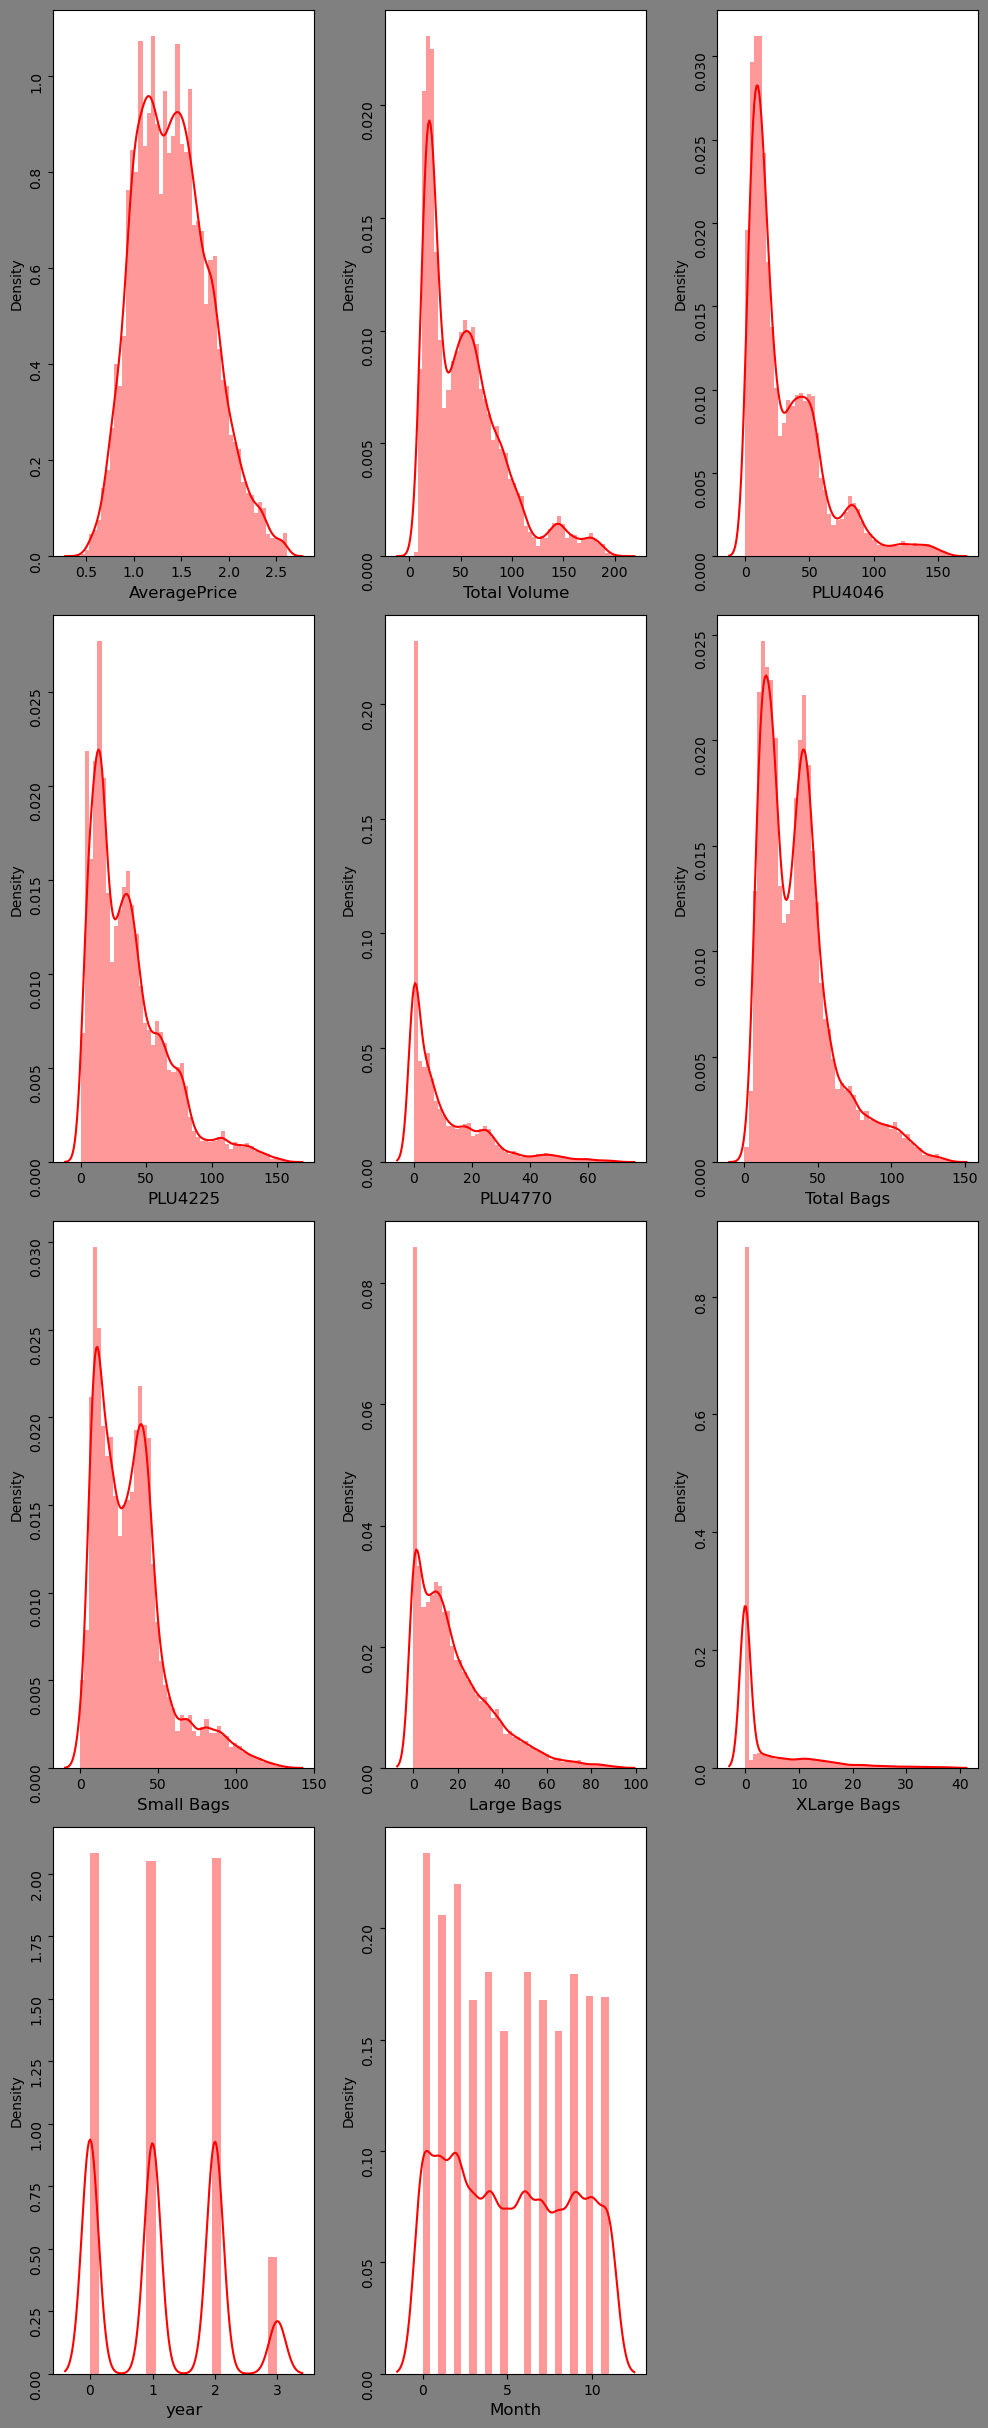

In [48]:
# Lets check how the data has been distributed in numerical column

plt.figure(figsize=(10,30),facecolor="grey")
pltno=1
for col in num_col:
    if pltno<=11:
        ax=plt.subplot(5,3,pltno)
        sns.distplot(df1[col],color="r")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 90, fontsize = 10)
    pltno+=1
plt.tight_layout()

Observation: Skewness has been almost removed only XLarge Bags has skewness which has also been lowered considerably

# Correlation b/w target variable and independent variable

# Multicollinearity

In [49]:
cor=df1.corr()
cor

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.528935,-0.538927,-0.430888,-0.451147,-0.504768,-0.458453,-0.454450,-0.300001,0.613150,0.091704,-0.003242,0.149502
Total Volume,-0.528935,1.000000,0.903102,0.940370,0.793520,0.953857,0.941018,0.731893,0.623303,-0.717424,0.039580,0.076952,-0.023242
PLU4046,-0.538927,0.903102,1.000000,0.742185,0.704297,0.833500,0.818643,0.671638,0.570552,-0.649432,-0.007901,0.155491,-0.019134
PLU4225,-0.430888,0.940370,0.742185,1.000000,0.778158,0.863948,0.861860,0.626928,0.566096,-0.687835,-0.020441,0.025405,-0.021965
PLU4770,-0.451147,0.793520,0.704297,0.778158,1.000000,0.721926,0.730112,0.497304,0.619253,-0.642326,-0.089506,-0.030916,-0.027308
Total Bags,-0.504768,0.953857,0.833500,0.863948,0.721926,1.000000,0.973676,0.792434,0.628105,-0.658982,0.171073,0.087521,-0.012091
Small Bags,-0.458453,0.941018,0.818643,0.861860,0.730112,0.973676,1.000000,0.656224,0.628709,-0.659243,0.152041,0.076144,-0.008672
Large Bags,-0.454450,0.731893,0.671638,0.626928,0.497304,0.792434,0.656224,1.000000,0.434630,-0.475409,0.177150,0.117769,-0.014149
XLarge Bags,-0.300001,0.623303,0.570552,0.566096,0.619253,0.628105,0.628709,0.434630,1.000000,-0.520516,0.155129,-0.044703,0.008276
type,0.613150,-0.717424,-0.649432,-0.687835,-0.642326,-0.658982,-0.659243,-0.475409,-0.520516,1.000000,0.003867,0.018409,-0.009499


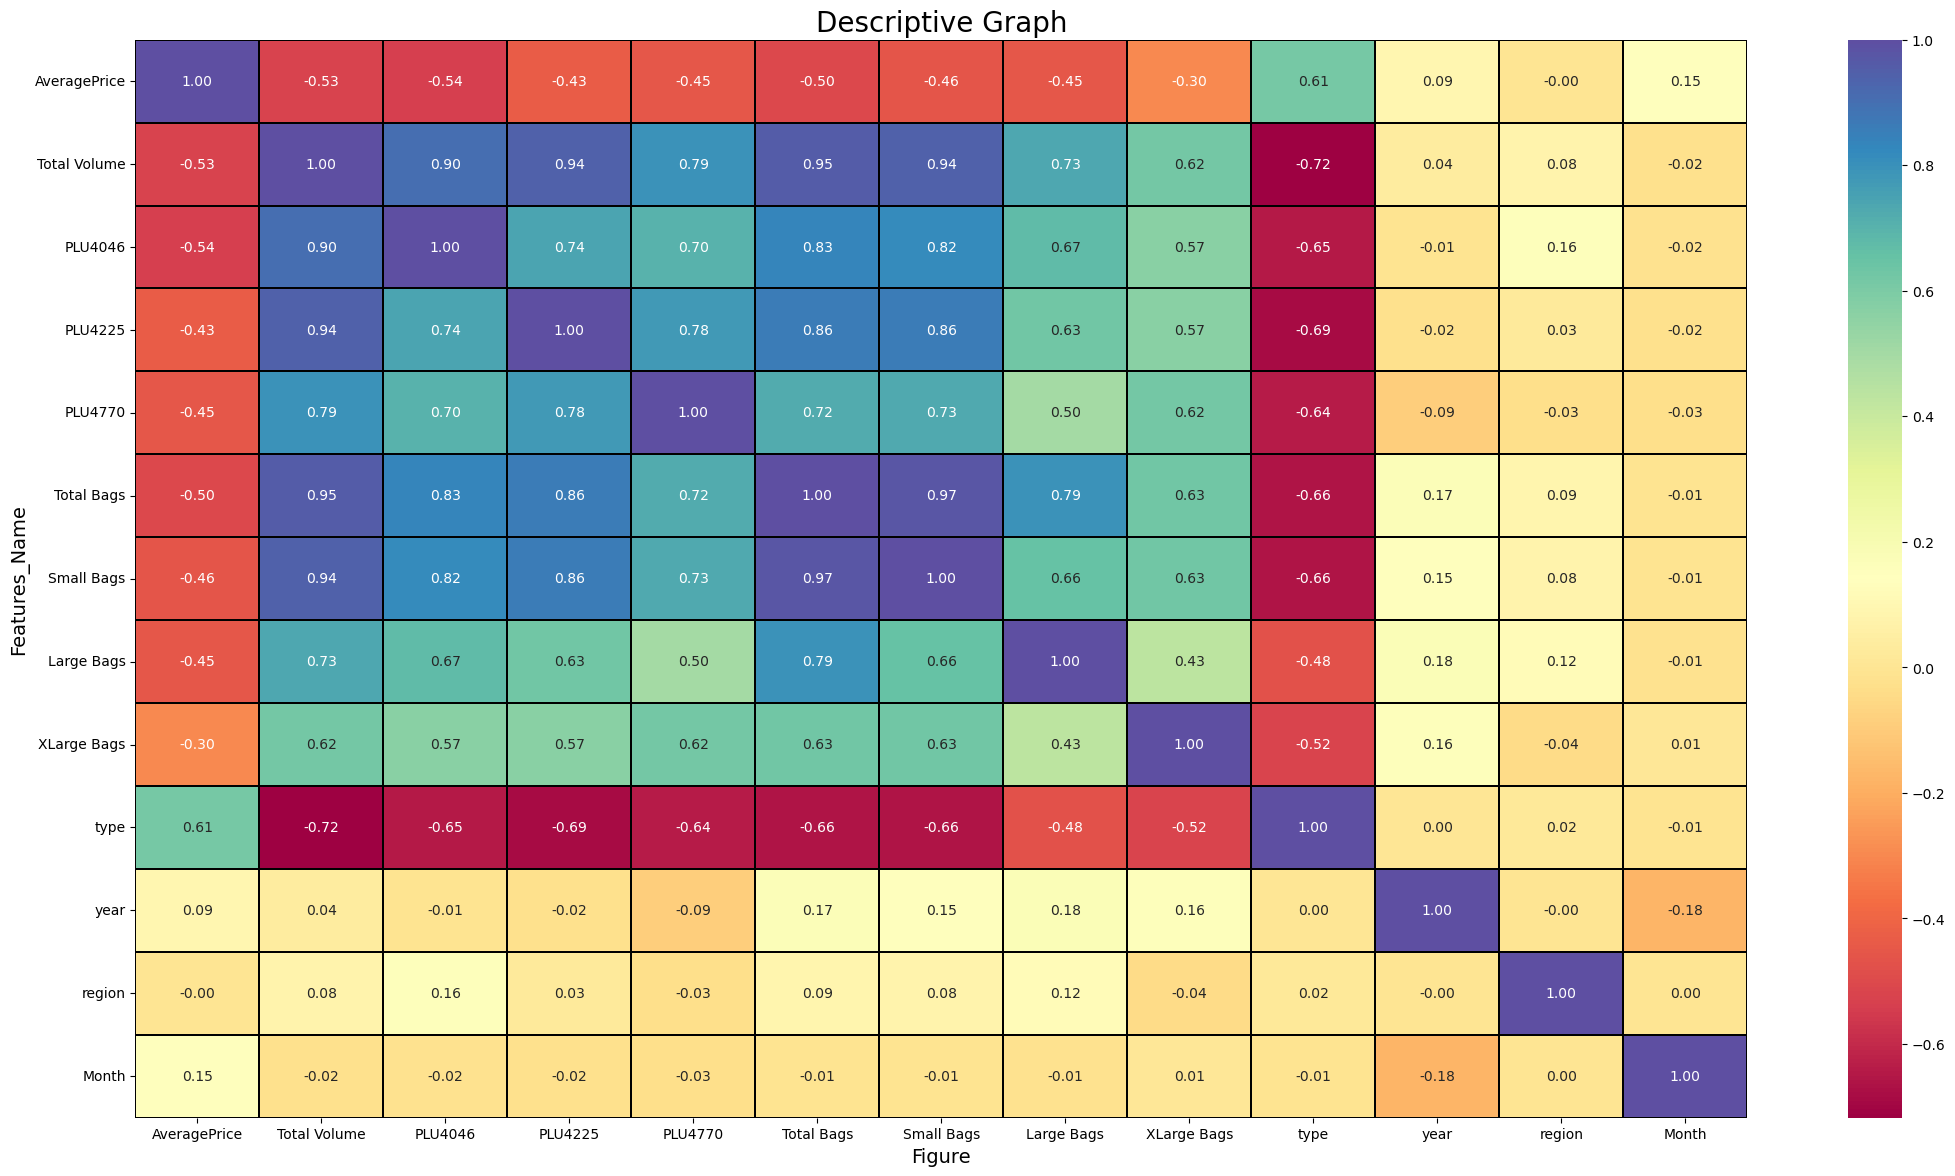

In [50]:
#Visualizing the correlation marix by using  heatmap

plt.figure(figsize=(26,14))
sns.heatmap(cor,annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

Observation: From the above 2 visualization it is evident that
Average Price has very low positive corealtion with year, month and -ve with others
Strong positive relation between Total Volume and PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags
Strong positive relation between PLU4046 and TotalVolume,PLU4225, PLU4770, TotalBags,SmallBags,LargeBags,XLargeBags
Similar strong positive corelations can be seen in case of PLU 4770, LargeBags, SmallBags,XlargeBags and Total Bags
Encoding Categorical Variables
Observation: Since month and year can be considered as categorical variable hence converting them in form of 1,2,3,4--

In [51]:
cor["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
type            0.613150
Month           0.149502
year            0.091704
region         -0.003242
XLarge Bags    -0.300001
PLU4225        -0.430888
PLU4770        -0.451147
Large Bags     -0.454450
Small Bags     -0.458453
Total Bags     -0.504768
Total Volume   -0.528935
PLU4046        -0.538927
Name: AveragePrice, dtype: float64

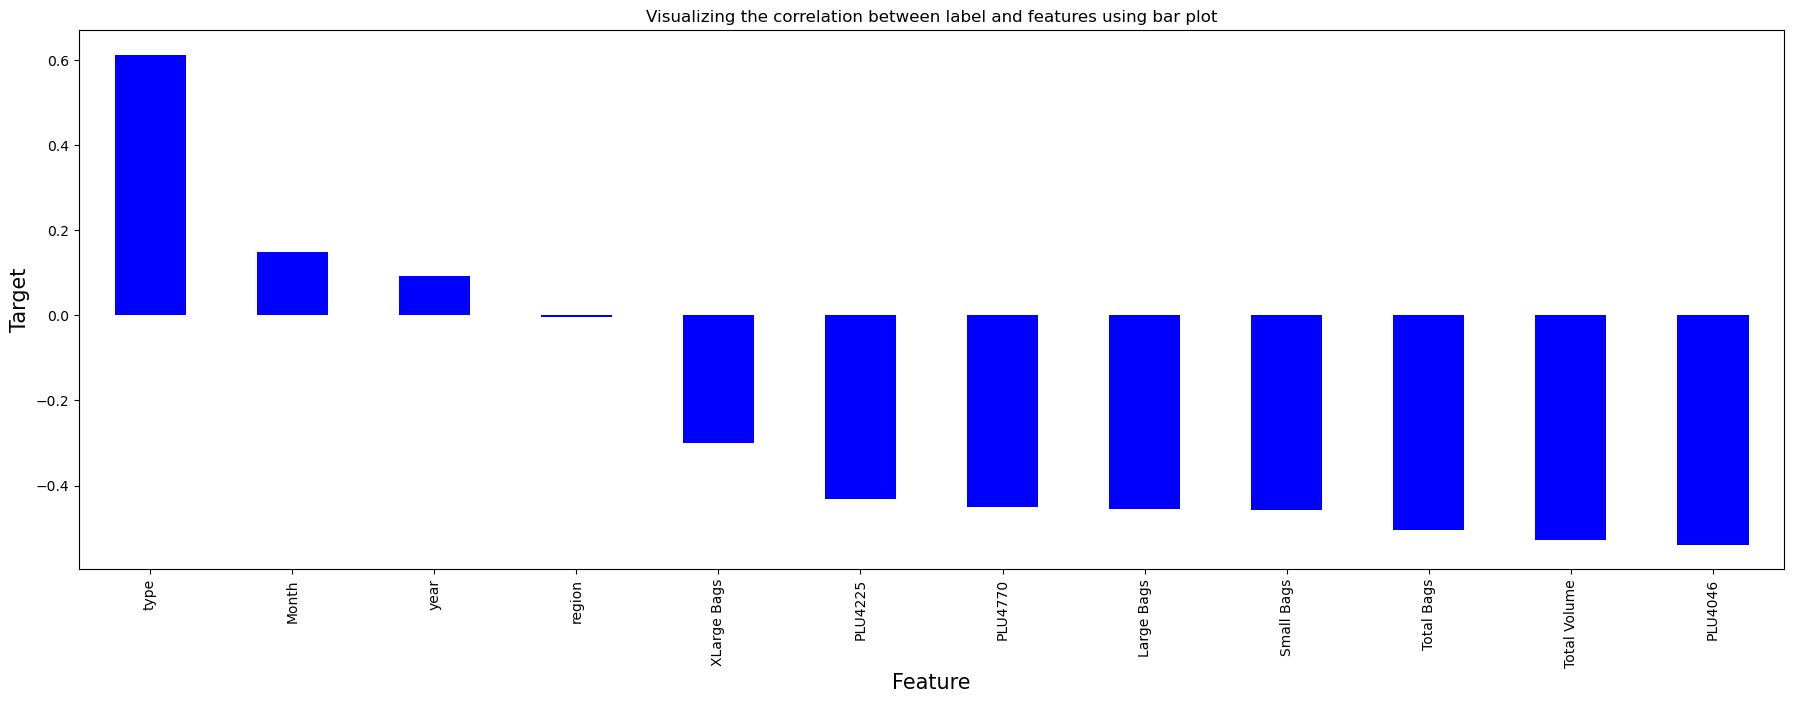

In [52]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
cor["AveragePrice"].sort_values(ascending=False).drop(["AveragePrice"]).plot(kind='bar',color='b')
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Visualizing the correlation between label and features using bar plot")
plt.show()


Target label +ve correlation b/w type, month and year and all other features are -ve correlated

# Determination of Average Price - Regression Problem

In [53]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [54]:
x

,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,0.0,11.0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,0.0,11.0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,0.0,11.0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,0.0,11.0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,3.0,53.0,1.0
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,3.0,53.0,0.0
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,3.0,53.0,0.0
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,3.0,53.0,0.0


In [55]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

# Scaling Data Using Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,-1.695495,1.644612
1,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,-1.695495,1.644612
2,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,-1.695495,1.644612
3,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,-1.695495,1.644612
4,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,-1.695495,1.362113
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756,1.747054,-1.180379
17647,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756,1.747054,-1.462878
17648,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756,1.747054,-1.462878
17649,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756,1.747054,-1.462878


In [57]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,203.244714,Total Volume
1,24.883803,PLU4046
2,40.499086,PLU4225
3,3.313652,PLU4770
4,117.583772,Total Bags
5,63.686607,Small Bags
6,9.035605,Large Bags
7,1.974984,XLarge Bags
8,2.187179,type
9,1.385548,year


In [58]:
x.drop('Total Volume',axis=1,inplace=True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,4.164479,PLU4046
1,5.632226,PLU4225
2,3.284215,PLU4770
3,98.850649,Total Bags
4,63.617583,Small Bags
5,9.035601,Large Bags
6,1.962472,XLarge Bags
7,2.169910,type
8,1.384146,year
9,1.089647,region


as VIF value is high of total bags and small bags but cannot drop more columns as limited dataset.

# Modelling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

In [95]:


# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Extra Tree', ExtraTreesRegressor()),
    ('Bagging', BaggingRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ("svr", SVR())]

# Variables to store the best results
best_random_states = []
best_accuracies = []

# Evaluate each model
for model_name, model in models:
    maxAcc = 0
    maxRs = 0
    for i in range(1, 100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        acc = r2_score(y_test, pred)
        if acc > maxAcc:
            maxAcc = acc
            maxRs = i
    best_random_states.append((model_name, maxRs))
    best_accuracies.append((model_name, maxAcc))
    print(f'Max r2 score for {model_name} is: {maxAcc} on Random State {maxRs}')

# Print summary of results
print("\nSummary of best random states and accuracies for each model:")
for i in range(len(models)):
    model_name = models[i][0]
    print("Maximum r2 score is", best_accuracies[i][1], "on Random_state", best_random_states[i][1])



Max r2 score for Linear Regression is: 0.5497530071112215 on Random State 6
Max r2 score for Gradient Boosting is: 0.7579542567919884 on Random State 82
Max r2 score for Random Forest is: 0.8994046079005293 on Random State 3
Max r2 score for Lasso is: 0 on Random State 0
Max r2 score for Ridge is: 0.5497695191734226 on Random State 6
Max r2 score for Decision Tree is: 0.7800251207345498 on Random State 41
Max r2 score for KNN is: 0.8842303937364684 on Random State 88
Max r2 score for Extra Tree is: 0.9216765021753687 on Random State 83
Max r2 score for Bagging is: 0.8834225785121851 on Random State 40
Max r2 score for AdaBoost is: 0.601495579292877 on Random State 82



KeyboardInterrupt



# a) Linear Regression

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=6)

In [62]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_lr))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_score:  0.5497530071112215
R2 score on training data:  0.5171309705664968
Mean Absolute Error:  0.20541001181454838
Mean Squared Error:  0.06796701224295082
Root Mean Squared Error:  0.26070483739844724


In [63]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_lr)-(score.mean()))*100)

[-0.43441548  0.28597609  0.38179701  0.15393067  0.19653968]
0.11676559375387605
Difference between R2 Score and Cross Validation Score:  43.29874133573455


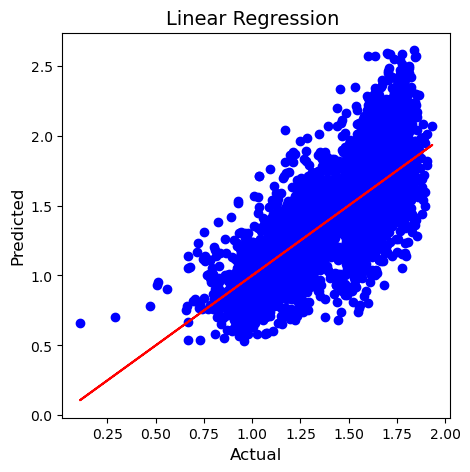

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_lr, y= y_test, color = 'b')
plt.plot(pred_lr,pred_lr,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Linear Regression ', fontsize = 14)
plt.show()

# b) Gradient Boosting Regressor

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=82)

In [66]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_gbr))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_score:  0.7579542567919884
R2 score on training data:  0.7564949621514722
Mean Absolute Error:  0.14641405598755106
Mean Squared Error:  0.03627109140365069
Root Mean Squared Error:  0.19044970833175537


In [67]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_gbr)-(score.mean()))*100)

[0.09221604 0.56371902 0.65964268 0.33857391 0.24596437]
0.380023205171102
Difference between R2 Score and Cross Validation Score:  37.79310516208864


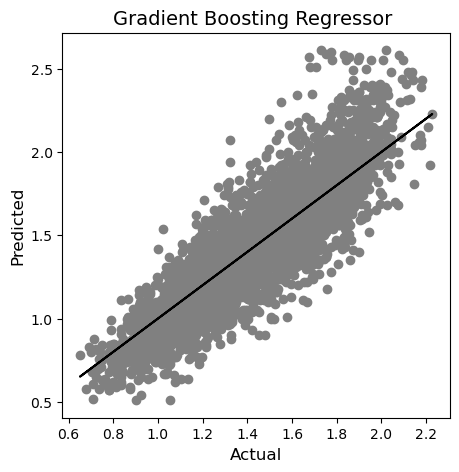

In [68]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_gbr, y= y_test, color = 'grey')
plt.plot(pred_gbr,pred_gbr,color='black')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Gradient Boosting Regressor ', fontsize = 14)
plt.show()

# c) Random Forest Regressor

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=3)

In [70]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.9009674378615893
R2 score on training data:  0.9839752719887606
Mean Absolute Error:  0.08725344095157178
Mean Squared Error:  0.014634101062022085
Root Mean Squared Error:  0.1209714886327439


In [71]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_RFR)-(score.mean()))*100)

[-0.26749888  0.47677348  0.60613488  0.22019478  0.03936084]
0.2149930211029789
Difference between R2 Score and Cross Validation Score:  68.59744167586103


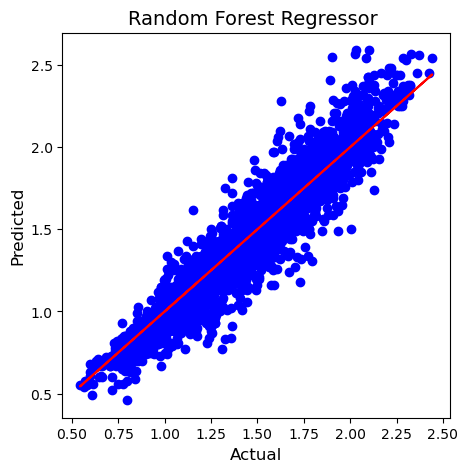

In [72]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_RFR, y= y_test, color = 'b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Random Forest Regressor ', fontsize = 14)
plt.show()

# d) Kneighbour Regressor

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=88)

In [76]:
KNN = knn()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2_score: ',r2_score(y_test,pred_KNN))
print('R2 score on training data: ',r2_score(y_train,pred_train))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score:  0.8842303937364684
R2 score on training data:  0.9204588586620309
Mean Absolute Error:  0.09225715094873974
Mean Squared Error:  0.01707034154630416
Root Mean Squared Error:  0.13065351716009854


In [77]:
score = cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_KNN)-(score.mean()))*100)

[-0.85681897  0.22960668  0.38182213 -0.05300003 -0.08520725]
-0.07671948954449256
Difference between R2 Score and Cross Validation Score:  96.0949883280961


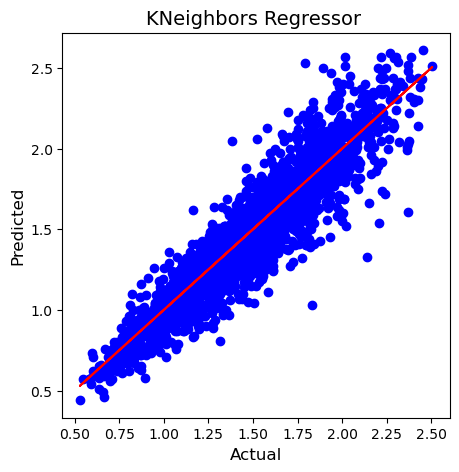

In [78]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_KNN, y= y_test, color = 'b')
plt.plot(pred_KNN,pred_KNN,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('KNeighbors Regressor ', fontsize = 14)
plt.show()

# e) Extra Trees Regressor

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=83)

In [80]:
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
pred_ET= ET.predict(x_test)
pred_train=ET.predict(x_train)
print("R2_score:",r2_score(y_test,pred_ET))
print("R2 score on Training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ET))
print("Mean Squared Error:",mean_squared_error(y_test,pred_ET))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ET)))

R2_score: 0.9208268136426592
R2 score on Training data: 100.0
Mean Absolute Error: 0.07600628717077312
Mean Squared Error: 0.011670824049844227
Root Mean Squared Error: 0.10803158820384076


In [81]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,pred_ET)-(score.mean()))*100)

[-0.12951165  0.50642505  0.65106997  0.29835974  0.11476348]
0.2882213168889308
Difference between R2 Score and Cross Validation Score:  63.260549675372836


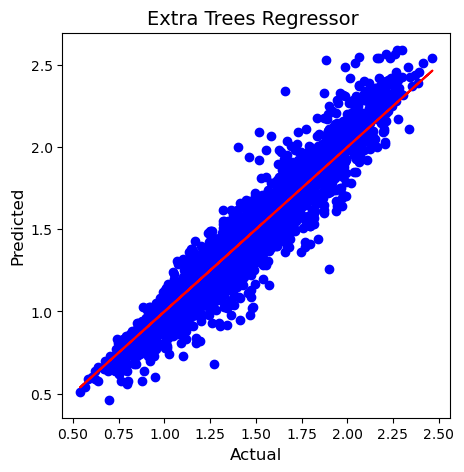

In [82]:
plt.figure(figsize=(5,5))
plt.scatter(x=pred_ET, y= y_test, color = 'b')
plt.plot(pred_ET,pred_ET,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Extra Trees Regressor ', fontsize = 14)
plt.show()

# f) Bagging Regressor

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [84]:
BR=BaggingRegressor()
BR.fit(x_train,y_train)
predBR= BR.predict(x_test)
predtrain=BR.predict(x_train)
print("R2_score:",r2_score(y_test,predBR))
print("R2 score on Training data:",r2_score(y_train,predtrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,predBR))
print("Mean Squared Error:",mean_squared_error(y_test,predBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predBR)))

R2_score: 0.8767488061346753
R2 score on Training data: 97.52696359289344
Mean Absolute Error: 0.0957470971396205
Mean Squared Error: 0.018230677711696404
Root Mean Squared Error: 0.13502102692431428


In [85]:
score = cross_val_score(BR,x,y)
print(score)
print(score.mean())
print('Difference between R2 Score and Cross Validation Score: ', (r2_score(y_test,predBR)-(score.mean()))*100)

[-0.34032452  0.47083409  0.56636149  0.08008359  0.0560834 ]
0.16660761175937816
Difference between R2 Score and Cross Validation Score:  71.01411943752971


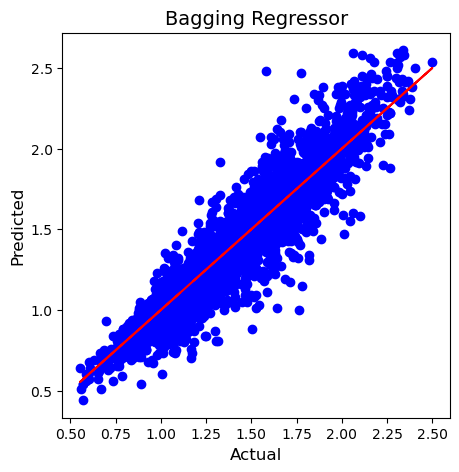

In [86]:
plt.figure(figsize=(5,5))
plt.scatter(x=predBR, y= y_test, color = 'b')
plt.plot(predBR,predBR,color='r')
plt.xlabel("Actual",fontsize = 12)
plt.ylabel("Predicted", fontsize = 12)
plt.title('Bagging Regressor', fontsize = 14)
plt.show()

As per above modelling techniques applied the best model is Extra Trees Regressor with R2 Score of 92 and difference between R2 Score and Cross Validation Score as 63 and error calculated is also on lower side 
Mean Absolute Error: 0.07
Mean Squared Error: 0.01
Root Mean Squared Error: 0.11

# Hyper Parameter Tuning

In [87]:
#Checking for ExtraTrees Regressor parameters
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ["squared_error","absolute_error","friedman_mse","poisson"],
             "random_state" : [10,50,1000],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200,300]}



In [88]:
GCV= GridSearchCV(ExtraTreesRegressor(),parameters, cv = 5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_param_

In [90]:
final_model=ExtraTreesRegressor(criterion="squared_error",random_state=50,max_depth= 20,n_jobs=-2,n_estimators=200)
final_model.fit(x_train,y_train)
prediET=final_model.predict(x_test)
preditrain=final_model.predict(x_train)
print(final_model)
print("R2_score:",r2_score(y_test,prediET))
print("R2 score on Training data:",r2_score(y_train,preditrain)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,prediET))
print("Mean Squared Error:",mean_squared_error(y_test,prediET))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediET)))

ExtraTreesRegressor(max_depth=20, n_estimators=200, n_jobs=-2, random_state=50)
R2_score: 0.9157654373627594
R2 score on Training data: 99.9469315654452
Mean Absolute Error: 0.0774114562932119
Mean Squared Error: 0.012459539867039583
Root Mean Squared Error: 0.11162230900245516


# Saving the model

In [91]:
import pickle
filename="Avacado_avg_price.pkl"
pickle.dump(final_model,open(filename,"wb"))# saved model

In [92]:
load_model=pickle.load(open("Avacado_avg_price.pkl","rb"))
result=load_model.score(x_test,y_test)
print(result*100)

91.57654373627592


In [93]:
conclusion =pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


In [94]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530
Predicted,1.190195,1.449794,1.089028,0.918911,1.053367,1.754912,0.95525,1.951057,1.956539,0.870035,...,1.71158,1.101628,1.702954,0.786257,1.495014,0.579403,1.767423,2.102122,1.0098,1.063982
Original,1.220000,1.490000,1.220000,0.940000,1.120000,1.790000,0.82000,2.270000,1.810000,0.880000,...,1.63000,1.110000,1.550000,0.790000,1.450000,0.540000,1.010000,2.400000,1.0700,0.810000


# Determination of Region - Classification Problem

In [95]:
x1 = df1.drop("region",axis=1)
y1 = df1.iloc[:,-2]

In [96]:
x1

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,11.0
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,11.0
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,11.0
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,11.0
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,3.0,1.0
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,3.0,0.0
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,3.0,0.0
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,3.0,0.0


In [97]:
y1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 17651, dtype: float64

# Scaling Using Standard Scaler

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.195352,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,1.644612
1,-0.143510,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,1.644612
2,-1.232207,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,1.644612
3,-0.843387,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,1.644612
4,-0.324959,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,1.362113
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756,-1.180379
17647,0.789660,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756,-1.462878
17648,1.204402,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756,-1.462878
17649,1.359930,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756,-1.462878


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,VIF Values,Features
0,2.143723,AveragePrice
1,203.725501,Total Volume
2,23.961848,PLU4046
3,42.114606,PLU4225
4,3.292717,PLU4770
5,120.643754,Total Bags
6,66.734243,Small Bags
7,9.113345,Large Bags
8,1.977798,XLarge Bags
9,2.757919,type


In [100]:
x1.drop('Total Volume',axis=1,inplace=True)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,VIF Values,Features
0,2.091518,AveragePrice
1,4.076086,PLU4046
2,5.960309,PLU4225
3,3.258845,PLU4770
4,104.917597,Total Bags
5,66.480832,Small Bags
6,9.112492,Large Bags
7,1.973015,XLarge Bags
8,2.757191,type
9,1.452599,year


In [102]:
y1.value_counts()

0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
35.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
18.0    338
27.0    338
8.0     338
2.0     338
13.0    338
12.0    338
11.0    338
4.0     338
5.0     338
10.0    338
9.0     338
20.0    337
1.0     337
28.0    337
33.0    336
41.0    336
40.0    336
14.0    336
50.0    336
31.0    335
24.0    335
25.0    333
48.0    333
21.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    292
6.0     290
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

# Applying Oversampling Using SMOTE

In [103]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x1,y1)

# Modelling

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [111]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Extra Tree', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('SVC', SVC())]

# Variables to store the best results
best_random_states = []
best_accuracies = []

# Evaluate each model
for model_name, model in models:
    maxAcc = 0
    maxRs = 0
    for i in range(1, 100):
        x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        acc = accuracy_score(y_test, pred)
        if acc > maxAcc:
            maxAcc = acc
            maxRs = i
    best_random_states.append((model_name, maxRs))
    best_accuracies.append((model_name, maxAcc))
    print("Max r2 score for ",model_name, "is:", maxAcc, "on Random State", maxRs)

# Print summary of results
print("\nSummary of best random states and accuracies for each model:")
for i in range(len(models)):
    model_name = models[i][0]
    print("Maximum r2 score is", best_accuracies[i][1], "on Random_state", best_random_states[i][1])



KeyboardInterrupt



# Creating Train Test Split

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=42)

# a) Random Forest Classifier

In [113]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9156318480642806
[[ 91   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   1  90   0]
 [  0   0   0 ...   0   0  81]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        98
         1.0       0.82      0.92      0.87        98
         2.0       0.97      1.00      0.98        94
         3.0       0.91      0.91      0.91        96
         4.0       0.92      0.99      0.95       102
         5.0       0.87      0.82      0.84       103
         6.0       0.97      1.00      0.98       113
         7.0       0.97      0.87      0.92       110
         8.0       0.98      1.00      0.99        83
         9.0       0.91      0.90      0.90       106
        10.0       0.83      0.89      0.85        96
        11.0       0.94      0.94      0.94       108
        12.0       0.92      0.94      0.93        83
        13.0       0.87      0.9

In [114]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predRFC)-score.mean())

[0.69241304 0.83976993 0.77863014 0.71671233 0.53041096]
0.7115872776458317
Difference betn accuracy score and CVC is:  0.2040445704184488


# b) Logistic Regression

In [115]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5383491599707816
[[56  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  2]
 [ 0  0 63 ...  0  0  2]
 ...
 [ 0  0  0 ... 98  3  0]
 [ 0  0  0 ...  3 84  0]
 [ 0 10  0 ...  0  0 25]]
              precision    recall  f1-score   support

         0.0       0.42      0.57      0.48        98
         1.0       0.30      0.34      0.32        98
         2.0       0.64      0.67      0.66        94
         3.0       0.45      0.48      0.46        96
         4.0       0.58      0.53      0.55       102
         5.0       0.49      0.56      0.52       103
         6.0       0.83      0.85      0.84       113
         7.0       0.65      0.75      0.70       110
         8.0       0.74      0.90      0.81        83
         9.0       0.45      0.75      0.57       106
        10.0       0.45      0.30      0.36        96
        11.0       0.47      0.56      0.51       108
        12.0       0.43      0.58      0.49        83
        13.0       0.54      0.39      0.45        87
        14.0  

In [116]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predLR)-score.mean())

[0.52396604 0.50643659 0.48739726 0.30273973 0.28164384]
0.4204366902668813
Difference betn accuracy score and CVC is:  0.11791246970390029


# c) Support Machine Vector Classifier

In [117]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7277209642074507
[[ 91   0   0 ...   0   0   0]
 [  0  56   0 ...   0   0   0]
 [  0   0  81 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   1  88   0]
 [  0   1   0 ...   0   0  62]]
              precision    recall  f1-score   support

         0.0       0.47      0.93      0.63        98
         1.0       0.49      0.57      0.53        98
         2.0       0.93      0.86      0.90        94
         3.0       0.76      0.62      0.69        96
         4.0       0.94      0.71      0.80       102
         5.0       0.79      0.61      0.69       103
         6.0       0.92      0.97      0.94       113
         7.0       0.79      0.76      0.78       110
         8.0       0.94      0.98      0.96        83
         9.0       0.63      0.70      0.66       106
        10.0       0.52      0.47      0.49        96
        11.0       0.60      0.81      0.69       108
        12.0       0.81      0.80      0.80        83
        13.0       0.49      0.5

In [118]:
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predsvc)-score.mean())

[0.67324021 0.72884141 0.59972603 0.44520548 0.3709589 ]
0.5635944064864946
Difference betn accuracy score and CVC is:  0.16412655772095608


# d) Gradient Boosting Classifier

In [119]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc = gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8425858290723156
[[79  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  3]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  2  0]
 [ 1  0  0 ...  1 87  0]
 [ 0  0  0 ...  0  0 74]]
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        98
         1.0       0.76      0.76      0.76        98
         2.0       0.94      0.96      0.95        94
         3.0       0.83      0.80      0.81        96
         4.0       0.86      0.90      0.88       102
         5.0       0.81      0.84      0.82       103
         6.0       0.95      0.98      0.97       113
         7.0       0.93      0.85      0.89       110
         8.0       0.96      0.98      0.97        83
         9.0       0.83      0.78      0.81       106
        10.0       0.76      0.78      0.77        96
        11.0       0.85      0.84      0.85       108
        12.0       0.84      0.90      0.87        83
        13.0       0.75      0.84      0.79        87
        14.0  

In [120]:
score=cross_val_score(gbc,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predgbc)-score.mean())

[0.57052862 0.77951246 0.72219178 0.63972603 0.45369863]
0.6331315045981022
Difference betn accuracy score and CVC is:  0.20945432447421342


# e) AdaBoost Classifier

In [121]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.0739590942293645
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ... 20  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        98
         1.0       0.00      0.00      0.00        98
         2.0       0.00      0.00      0.00        94
         3.0       0.21      0.16      0.18        96
         4.0       0.00      0.00      0.00       102
         5.0       0.00      0.00      0.00       103
         6.0       0.00      0.00      0.00       113
         7.0       0.00      0.00      0.00       110
         8.0       0.04      0.52      0.07        83
         9.0       0.00      0.00      0.00       106
        10.0       0.00      0.00      0.00        96
        11.0       0.11      0.32      0.16       108
        12.0       0.00      0.00      0.00        83
        13.0       0.00      0.00      0.00        87
        14.0  

In [122]:
score=cross_val_score(abc,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predabc)-score.mean())

[0.03697617 0.04354971 0.07945205 0.07205479 0.06684932]
0.05977640954064002
Difference betn accuracy score and CVC is:  0.014182684688724481


# f) Bagging Classifier

In [123]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8739956172388604
[[ 82   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   4]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   1  88   0]
 [  0   0   1 ...   0   0  64]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        98
         1.0       0.73      0.82      0.77        98
         2.0       0.93      1.00      0.96        94
         3.0       0.86      0.85      0.86        96
         4.0       0.88      0.96      0.92       102
         5.0       0.84      0.82      0.83       103
         6.0       0.93      1.00      0.97       113
         7.0       0.93      0.88      0.91       110
         8.0       0.92      1.00      0.96        83
         9.0       0.81      0.87      0.84       106
        10.0       0.77      0.84      0.81        96
        11.0       0.86      0.94      0.89       108
        12.0       0.86      0.95      0.90        83
        13.0       0.86      0.8

In [124]:
score=cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predbc)-score.mean())

[0.62174747 0.77348672 0.72054795 0.63808219 0.48547945]
0.6478687542913746
Difference betn accuracy score and CVC is:  0.22612686294748585


# g) Extra Tree Classifier

In [125]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9360847333820307
[[ 93   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   1  91   0]
 [  0   0   0 ...   0   0  84]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        98
         1.0       0.86      0.96      0.91        98
         2.0       0.99      1.00      0.99        94
         3.0       0.94      0.91      0.92        96
         4.0       0.96      1.00      0.98       102
         5.0       0.91      0.86      0.89       103
         6.0       1.00      1.00      1.00       113
         7.0       0.94      0.90      0.92       110
         8.0       0.98      1.00      0.99        83
         9.0       0.90      0.92      0.91       106
        10.0       0.89      0.92      0.90        96
        11.0       0.94      0.96      0.95       108
        12.0       0.93      0.96      0.95        83
        13.0       0.90      0.8

In [126]:
score=cross_val_score(etc,x1,y1)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predetc)-score.mean())

[0.72692413 0.82936182 0.78630137 0.71945205 0.52383562]
0.7171749980301888
Difference betn accuracy score and CVC is:  0.21890973535184188


In [ ]:
 Observation: Considering the difference between accuracy score and cross validation score as .21 and accuracy 93% the best model is Extra Trees Classifier

# Hyper Parameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ['gini','entropy'],
             "random_state" : [10,50,1000],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200,300]}

GCV1 = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
#GCV1.fit(x_train,y_train)
#GCV1.best_params_

In [129]:
best_model = ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=200,n_jobs=-1,random_state=42)
best_model.fit(x_train,y_train)
pred = best_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

93.77282688093499


In [132]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [133]:
y_pred_prob = best_model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

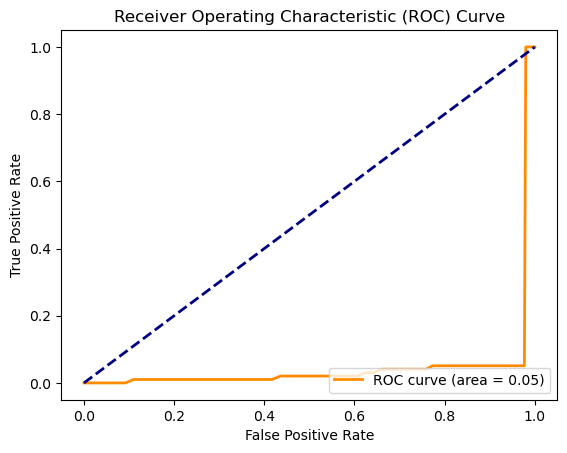

In [136]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Saving the model

In [137]:
import joblib
joblib.dump(best_model,'Avacado_region_indentifier.pki')

['Avacado_region_indentifier.pki']

In [138]:
model = joblib.load('Avacado_region_indentifier.pki')
prediction = model.predict(x_test)
prediction

array([39., 50.,  6., ..., 51., 29., 27.])

In [139]:
a = np.array(y_test)
df3 = pd.DataFrame()
df3['Predicted'] = prediction
df3['Original'] = a

In [140]:
df3

,Predicted,Original
0,39.0,39.0
1,50.0,50.0
2,6.0,6.0
3,30.0,30.0
4,30.0,30.0
...,...,...
5471,17.0,17.0
5472,33.0,33.0
5473,51.0,51.0
5474,29.0,29.0
